In [202]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Cargamos el dataset ###

In [204]:
# Ruta del archivo CSV
ruta_archivo = r'C:\Users\alvar\OneDrive\Escritorio\ML_Alvaro\adult.csv'

# Leer el archivo CSV y crear un DataFrame
df = pd.read_csv(ruta_archivo)

### Miramos el dataset ###

In [205]:
#Hacemos un Head para observar el dataset#
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


#### Contiene interrogaciones en 3 filas(serian valores nulos), por lo tanto los transformamos a Nan para que sean detectados ####

In [207]:
#Las interrogaciones serian como nulos y los transformamos a Nan para que los detecte#
df.replace('?', np.nan, inplace = True) # Here we replace '?' with nan
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [208]:
#Miramos las filas y columnas que tiene#
df.shape

(32561, 15)

In [209]:
#Miramos tipo de variables#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### De momento clasificiquemos las variables a falta de determinar la importancia o cuales incluir en futuro para nuestro modelo ###

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| age | Edad de la persona |Numerica discreta|0|
| workclass| Tipo de trabajo/categoria del empleo|Categorica nominal |  0 |
| fnlwgt|El número de personas que el censo cree que representa la entrada  |Numerica discreta| 0 |
|education | El maximo nivel de educacion obtenido| Categorica ordinal | 0  |
|education.num | Los años de educacion| Numerica discreta | 0  |
|marital.status| Estado civil | Categorica nominal | 0  |
|occupation| Sector laboral al que pertenece/especialidad laboral| Categorica nominal | 0  |
|relationship| Tipo de relacion familiar| Categorica nominal | 0  |
| race | Raza| Categorica nominal | 0  |
| sex | Sexo| Categorica nominal| 0  |
|capital.gain| Ganancia de capital| Numerica continua | 0  |
|capital.loss | Perdida de capital| Numerica continua | 0  |
|hours.per.week| Horas de trabajo semanal| Numerica discreta | 0  |
|native.country| Pais de origen| Categorica nominal | 0  |
|income| Ingresos anuales ≤ 50K o > 50K   | Booleano/Target | 0  |

#### Chequeamos los nulos ####

In [210]:
## Chequeamos los nulos ##

df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [211]:
## En este caso vamos a probar a reemplazar los valores NaN por la moda en las categoricas que tienen nulos ##

df["workclass"] = df["workclass"].fillna(df["workclass"].mode())
df["occupation"] = df["occupation"].fillna(df["occupation"].mode())
df["native.country"] = df["native.country"].fillna(df["native.country"].mode())

In [212]:
#Hacemos un describe para las variables numericas##
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### MINI EDA ###

#### Distribucion del target ####

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


<Axes: ylabel='count'>

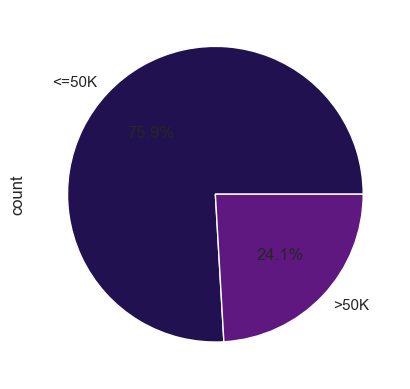

In [213]:
## Miramos la target y vemos como esta distribuida##
print(df['income'].value_counts())
df['income'].value_counts().plot.pie(autopct= '%1.1f%%')

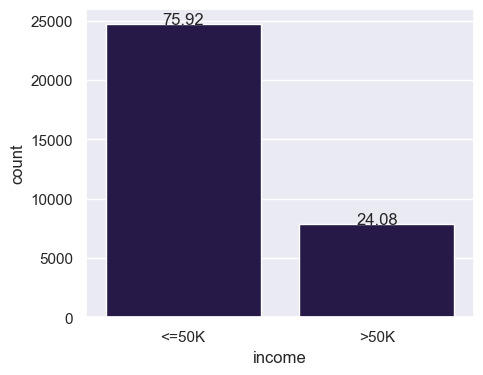

In [214]:
##Histograma del target(income)##
plt.figure(figsize=(5,4))
total = float(len(df) )
a = sns.countplot(x="income", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")

### ANALISIS UNIVARIANTE ###

#### Age ####

Text(0, 0.5, 'count')

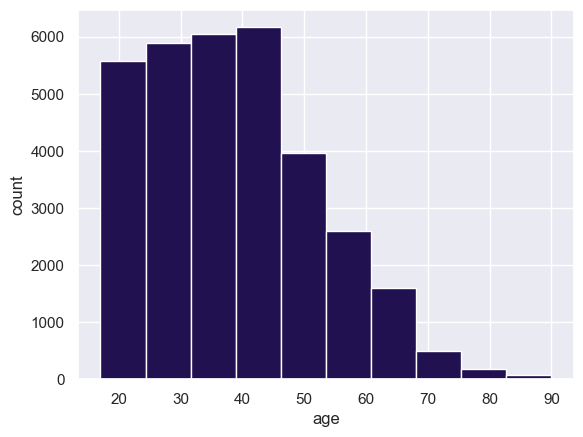

In [215]:
##Histograma de age##
df['age'].hist()
plt.xlabel('age')
plt.ylabel('count')

#### fnlwgt ####

Text(0, 0.5, 'count')

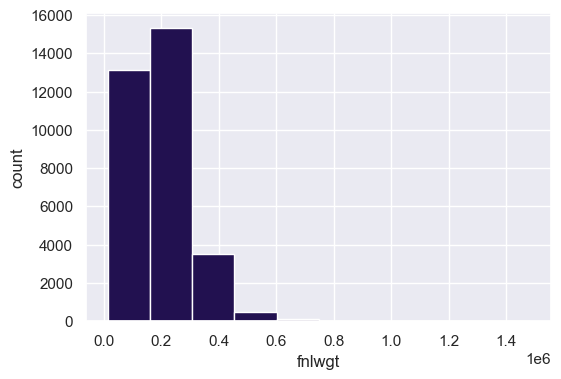

In [216]:
##Distribucion de final weight##
df['fnlwgt'].hist(figsize=(6,4))
plt.xlabel('fnlwgt')
plt.ylabel('count')

#### hours.per.week ####

Text(0, 0.5, 'count')

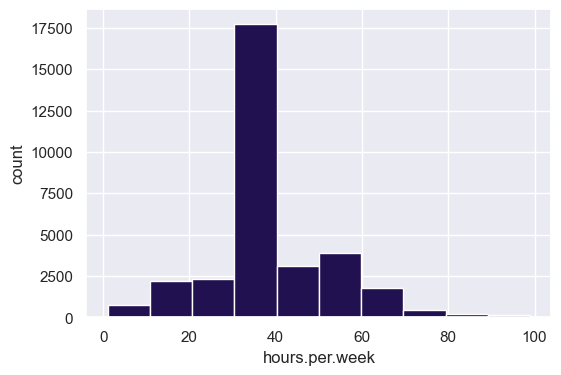

In [217]:
##Histograma de hour per week##
df['hours.per.week'].hist(figsize=(6,4))
plt.xlabel('hours.per.week')
plt.ylabel('count')

#### native.country ####

In [218]:
##Miramos los paises y la distribucion por pais##
df['native.country'].value_counts()

native.country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

#### capital.gain ####

Text(0, 0.5, 'count')

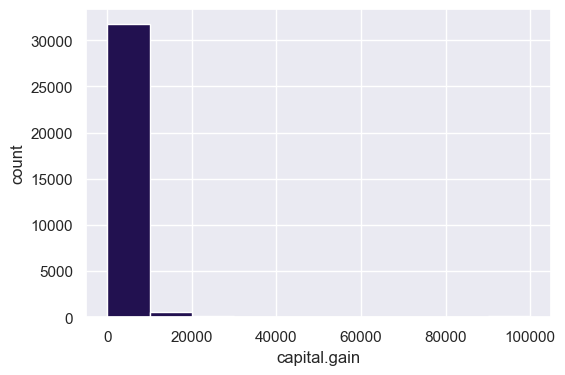

In [219]:
##Histogrmaa de capital Gain##
df['capital.gain'].hist(figsize=(6,4))
plt.xlabel('capital.gain')
plt.ylabel('count')

#### capital.loss ####

Text(0, 0.5, 'count')

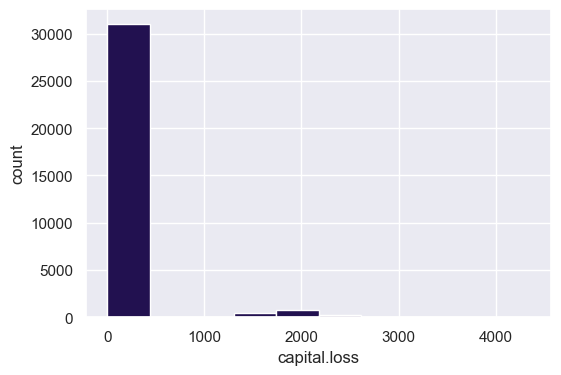

In [220]:
##Histograma de capital Loss##
df['capital.loss'].hist(figsize=(6,4))
plt.xlabel('capital.loss')
plt.ylabel('count')

#### marital status ####

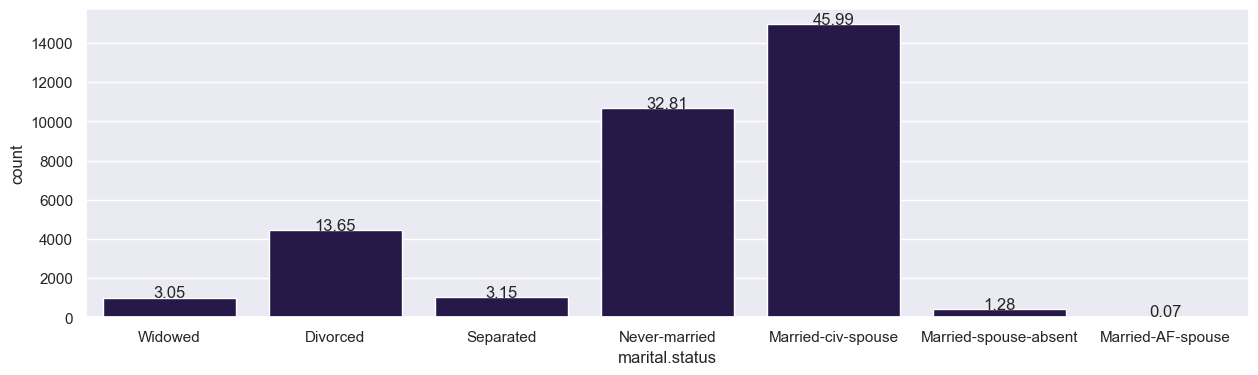

In [221]:
##Distribucion de marital status##
plt.figure(figsize=(15,4))
total = float(len(df) )
a = sns.countplot(x="marital.status", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:1.2f}'.format((height/total)*100),ha="center")

#### occupation ####

C:\Users\alvar\AppData\Local\Temp\ipykernel_82160\2389663190.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=60)


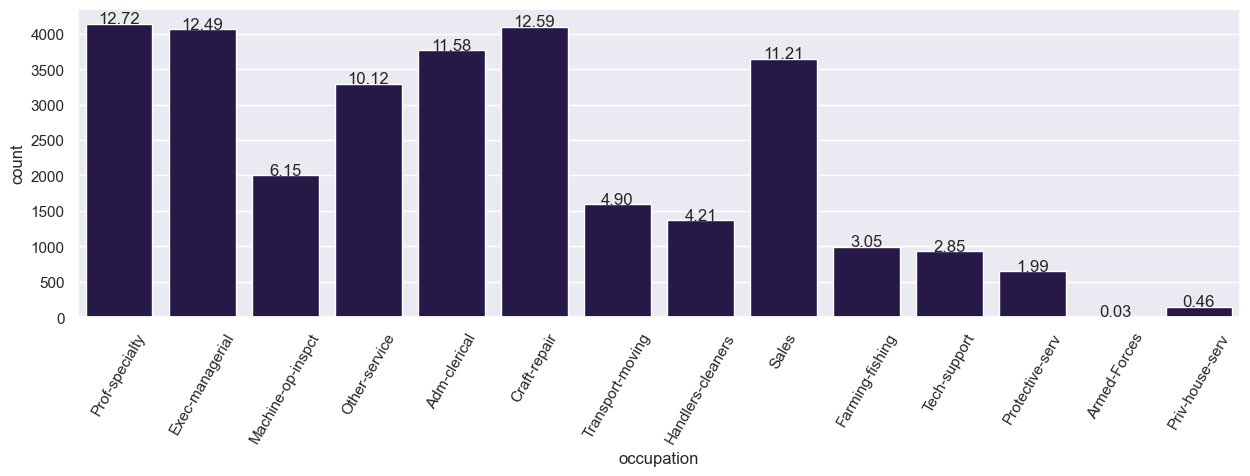

In [222]:
##Distribucion de occupation##
plt.figure(figsize=(15,4))
total = float(len(df) )
a = sns.countplot(x="occupation", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")
a.set_xticklabels(a.get_xticklabels(), rotation=60)
plt.show()

#### relationship ####

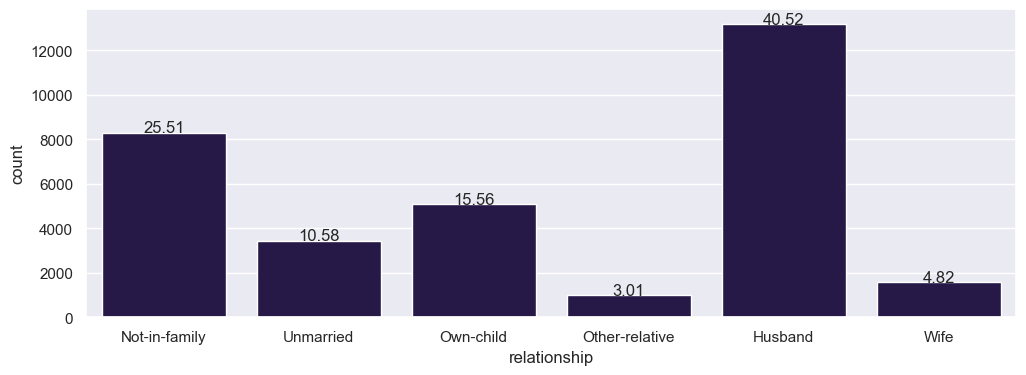

In [223]:
##Distribucion de relationship##
plt.figure(figsize=(12,4))
total = float(len(df) )
a = sns.countplot(x="relationship", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")

#### sex ####

<Axes: ylabel='count'>

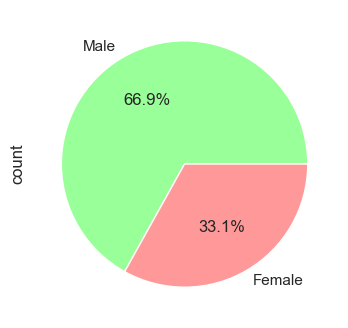

In [224]:
## Distribucion de sex ##
plt.figure(figsize=(10,4))
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#99ff99','#ff9999'])

#### workclass ####

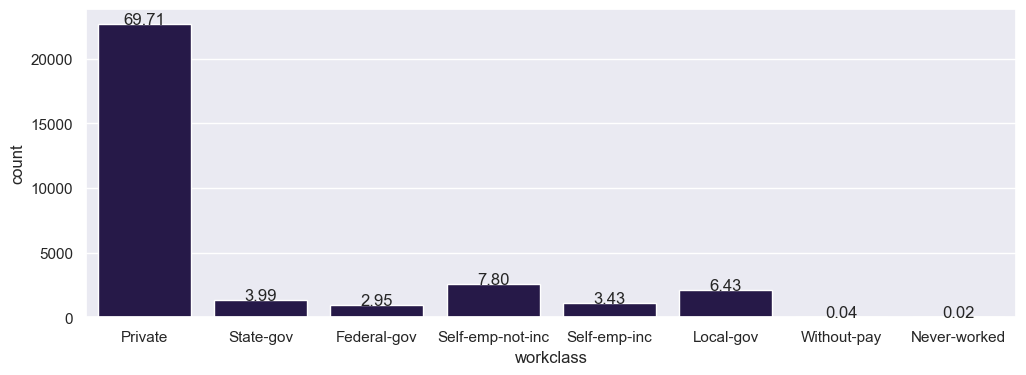

In [225]:
##Distribucion de workclass##
plt.figure(figsize=(12,4))
total = float(len(df) )
a = sns.countplot(x="workclass", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")

In [226]:
## Distribucion workclass ##
df.groupby('workclass').size()

workclass
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22697
Self-emp-inc         1116
Self-emp-not-inc     2541
State-gov            1298
Without-pay            14
dtype: int64

#### education ####

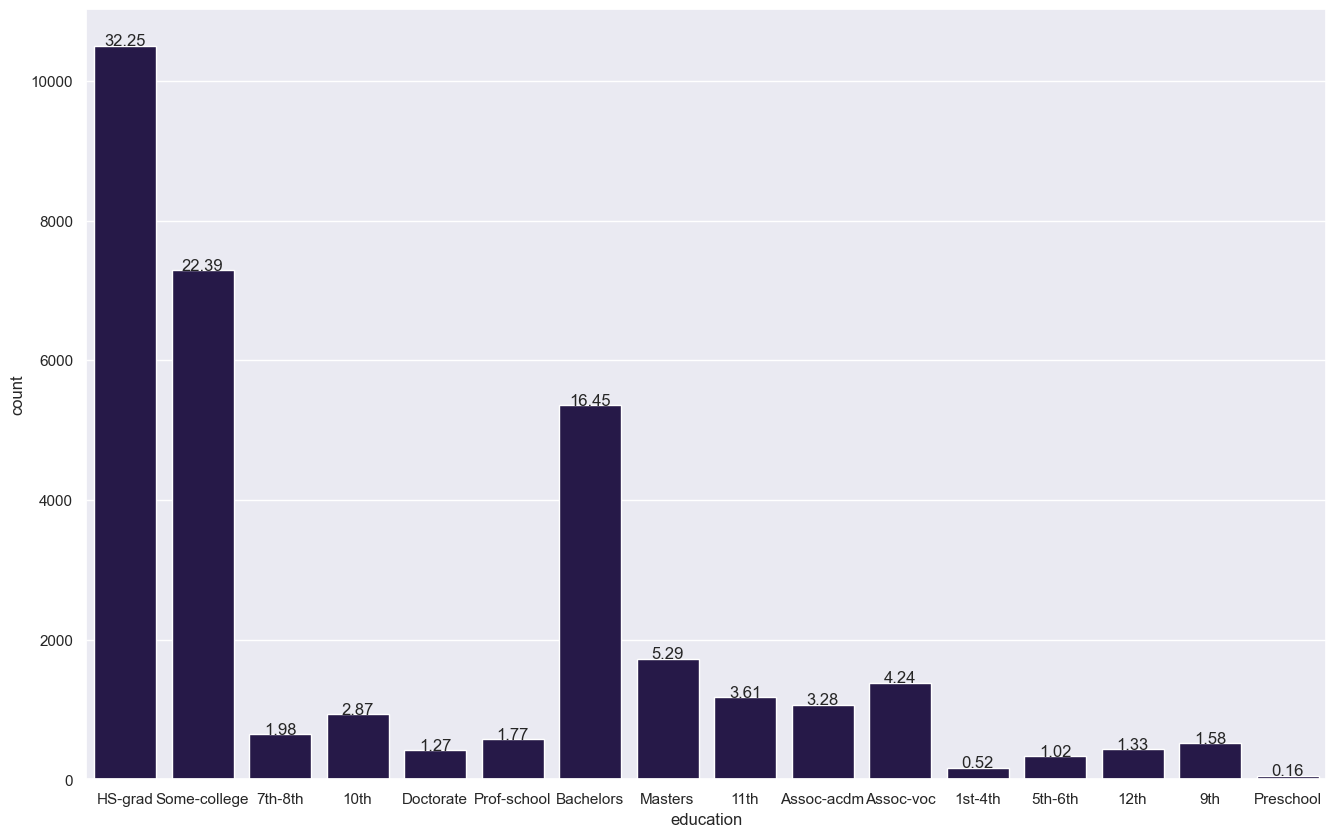

In [227]:
##Distribucion de education##
plt.figure(figsize=(16,10))
total = float(len(df) )
a = sns.countplot(x="education", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")

In [228]:
## Distribucion education ##
df.groupby('education').size()

education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
HS-grad         10501
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
dtype: int64

#### education.num ####

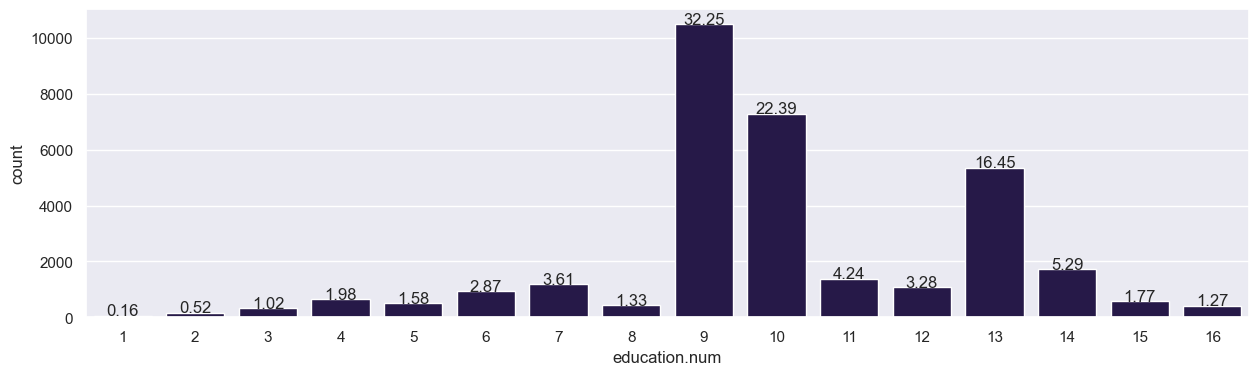

In [229]:
## Distribucion de education.num ##
plt.figure(figsize=(15,4))
total = float(len(df) )
a = sns.countplot(x="education.num", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:1.2f}'.format((height/total)*100),ha="center")

In [230]:
## Distribucion education.num##
df.groupby('education.num').size()

education.num
1        51
2       168
3       333
4       646
5       514
6       933
7      1175
8       433
9     10501
10     7291
11     1382
12     1067
13     5355
14     1723
15      576
16      413
dtype: int64

#### race ####

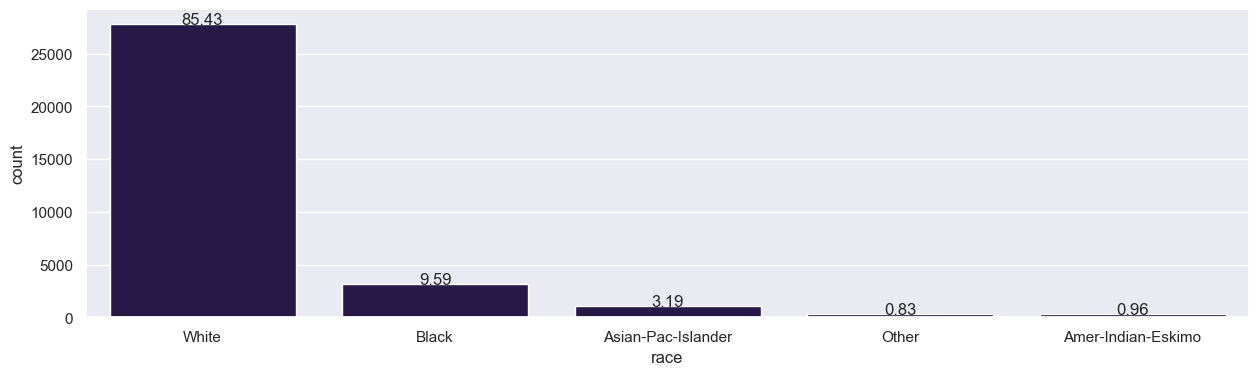

In [231]:
##Distribucion de race##
plt.figure(figsize=(15,4))
total = float(len(df) )
a = sns.countplot(x="race", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:1.2f}'.format((height/total)*100),ha="center")

In [232]:
## Distribucion race ##
df.groupby('race').size()

race
Amer-Indian-Eskimo      311
Asian-Pac-Islander     1039
Black                  3124
Other                   271
White                 27816
dtype: int64

#### Agrupacion categoricas juntas ####

In [233]:
target = ["income"]
columnas_categoricas = ["workclass", "education","marital.status", "occupation", "relationship", "race", "sex", "native.country"]

In [234]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


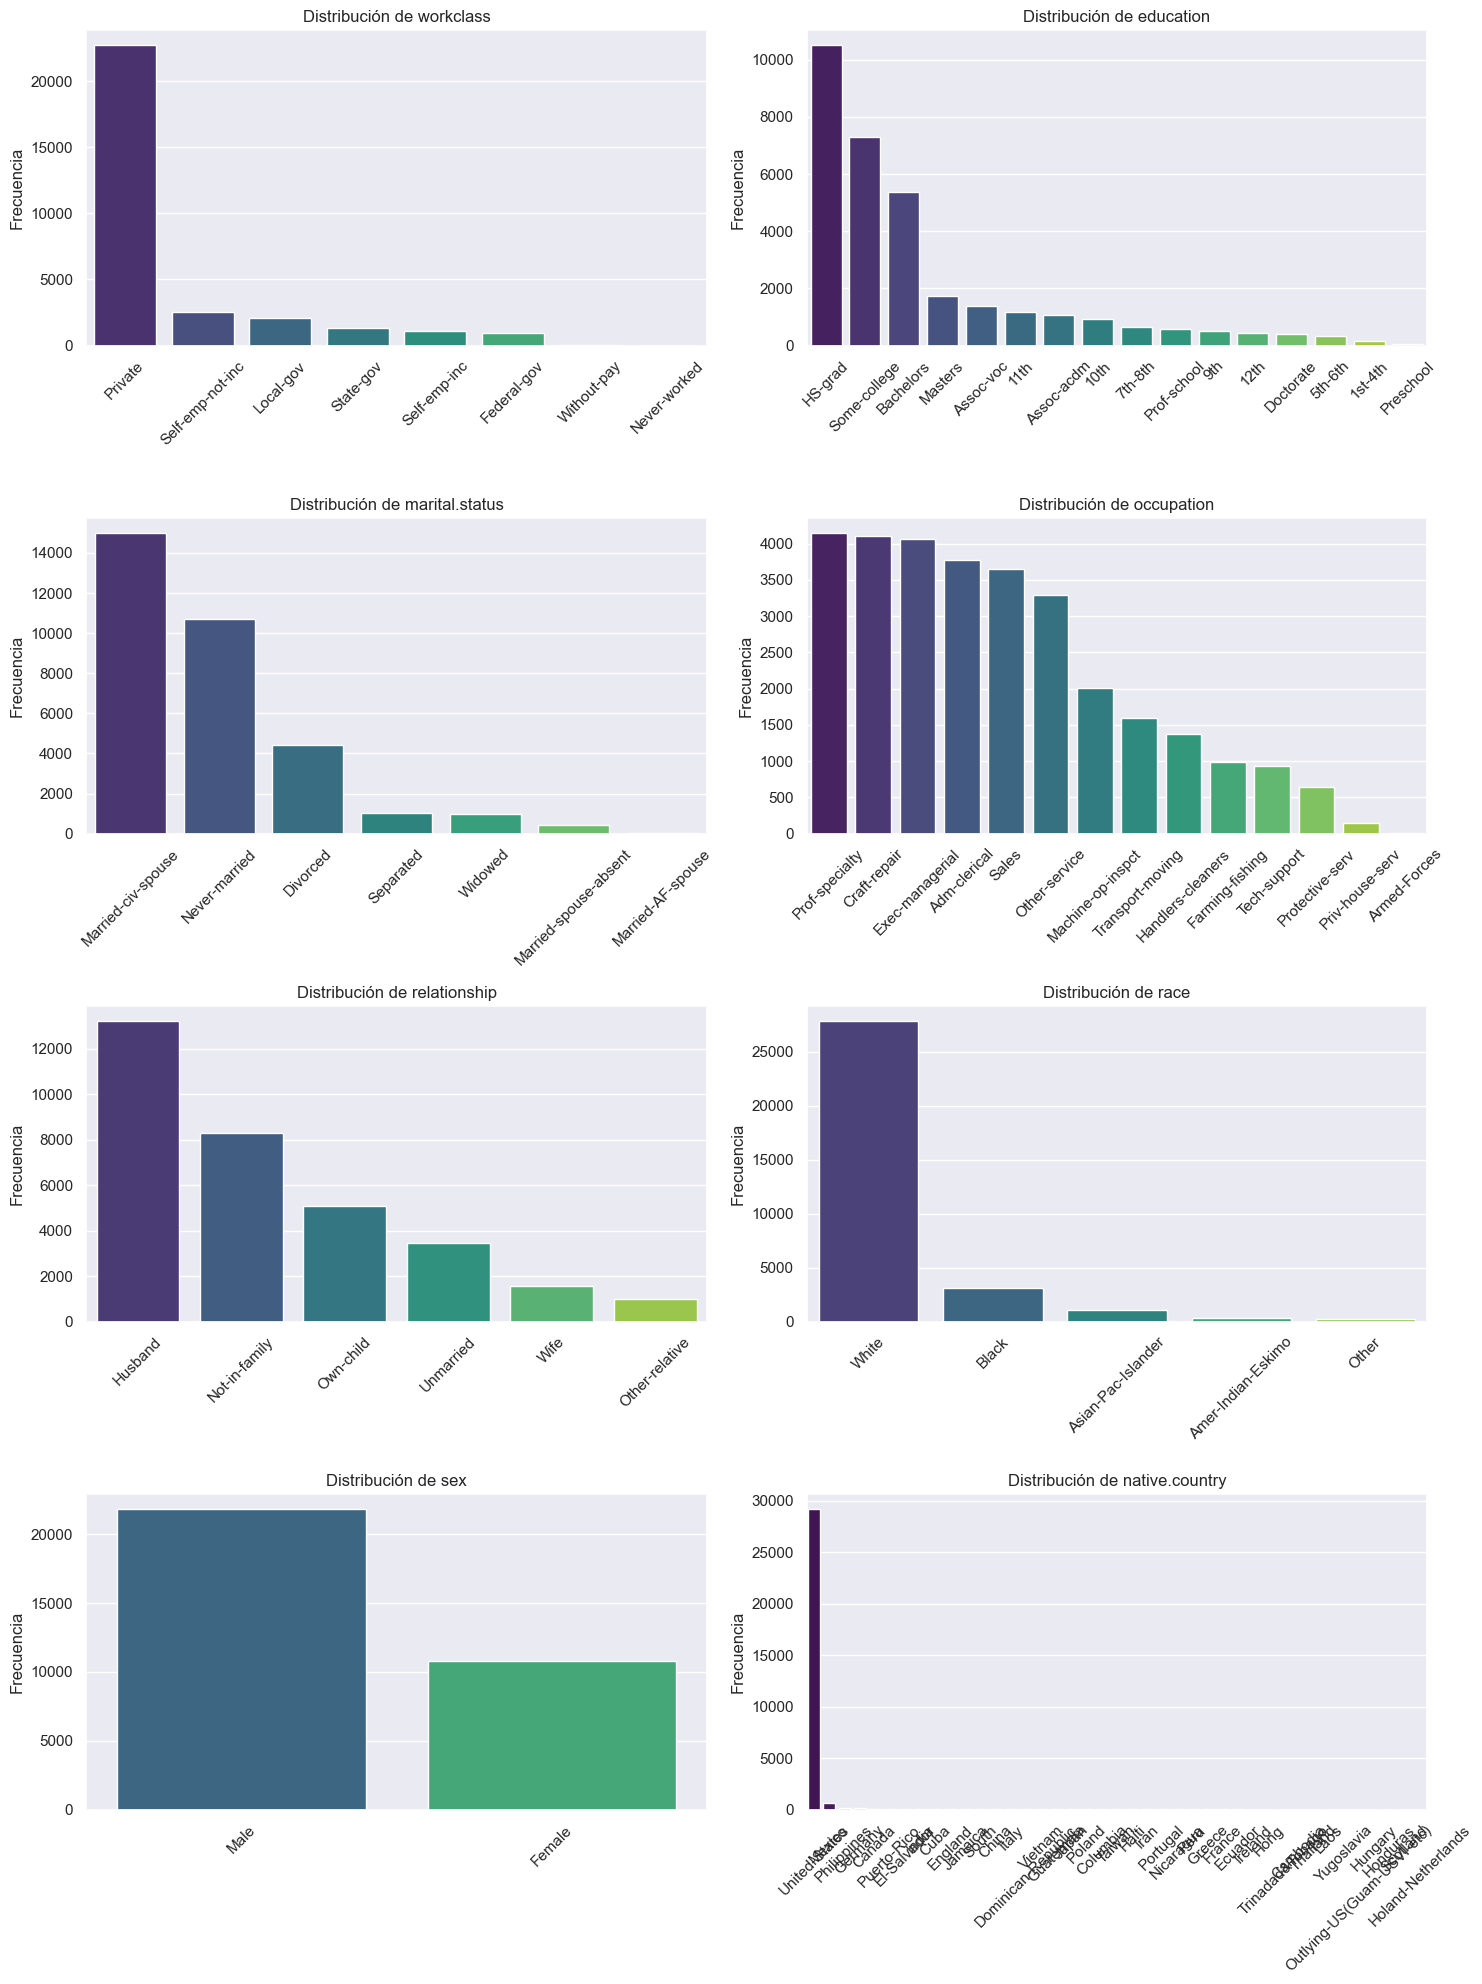

In [235]:
## Vemos distribucion categoricas todas juntas ##
pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False)

#### Agrupacion numericas juntas ####

In [236]:
columnas_numericas = ["age", "fnlwgt","education.num","capital.gain", "capital.loss", "hours.per.week"]

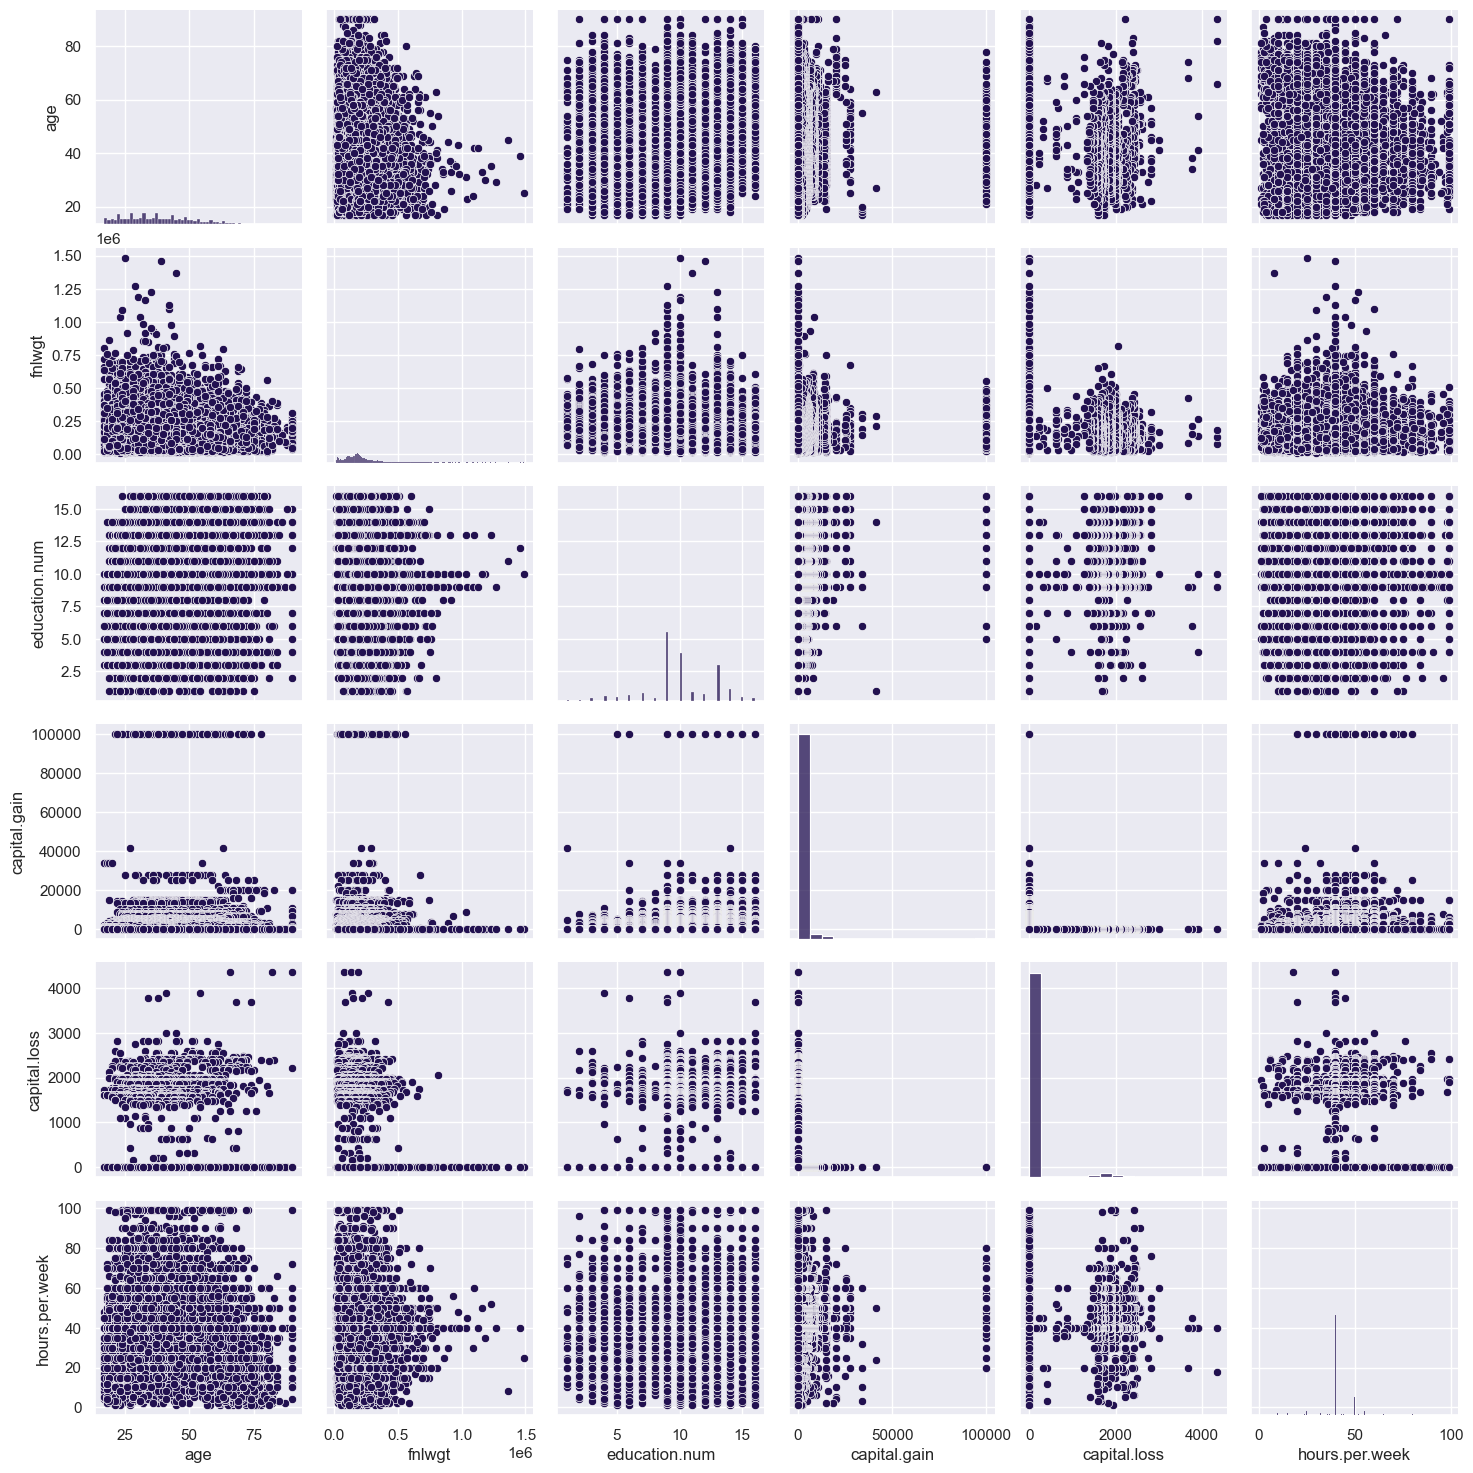

In [237]:
## Representacion solo variables numericas ##
sns.pairplot(df)
plt.show()

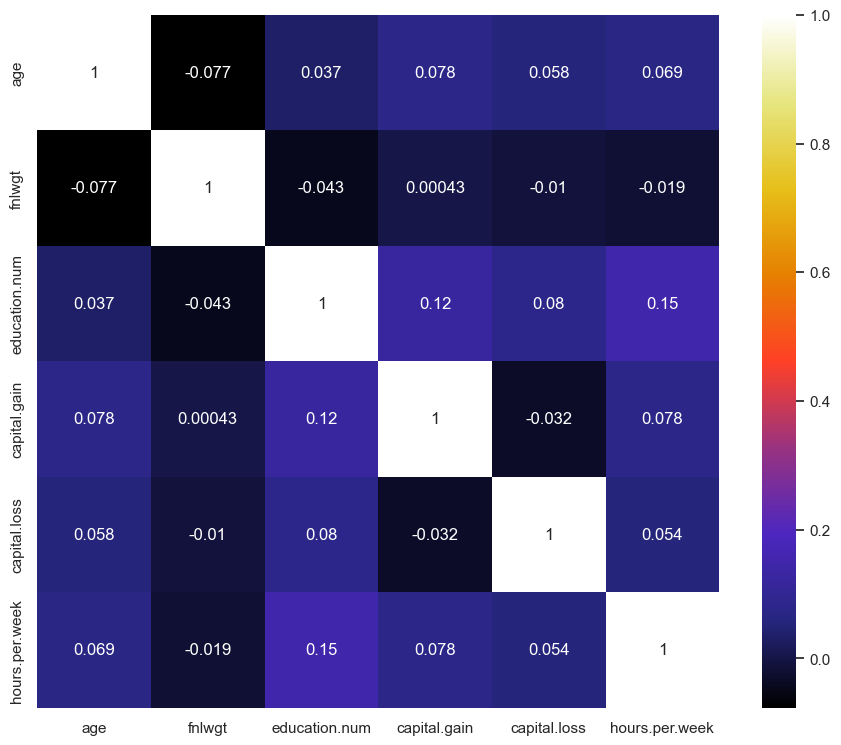

In [238]:
## Correlacion solo entre numericas ##
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(11, 9))
sns.heatmap(numeric_df.corr(), cmap="CMRmap", annot=True)
plt.show()

### ANALISIS BIVARIANTE ###

#### Workclass con target ####

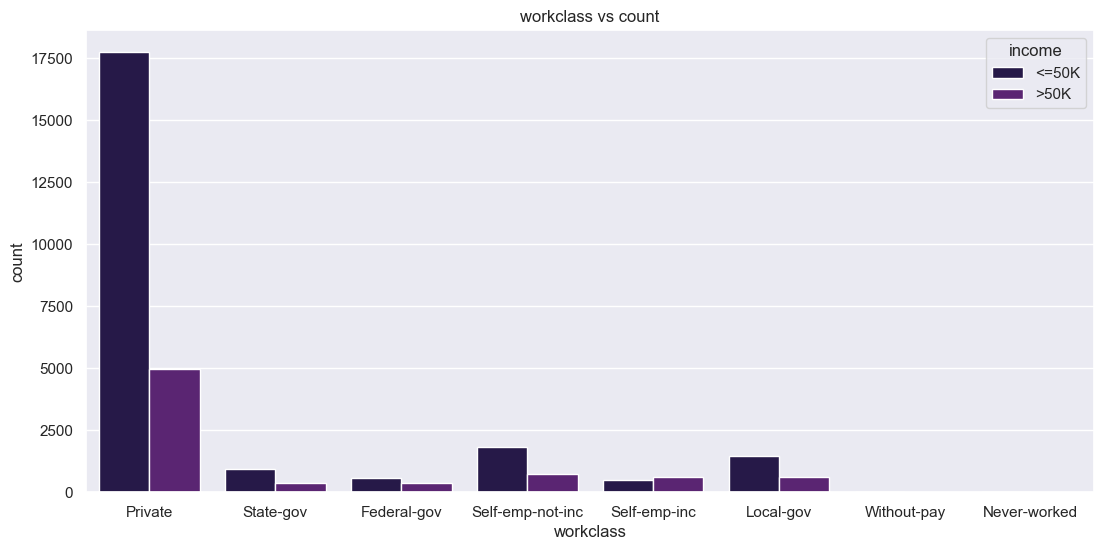

In [239]:
##Miremos la relacion de workclass con income(target)##
plt.figure(figsize=(13,6))
a=sns.countplot(x='workclass',hue ='income',data=df).set_title("workclass vs count")

Text(0.5, 1.0, 'Workclass')

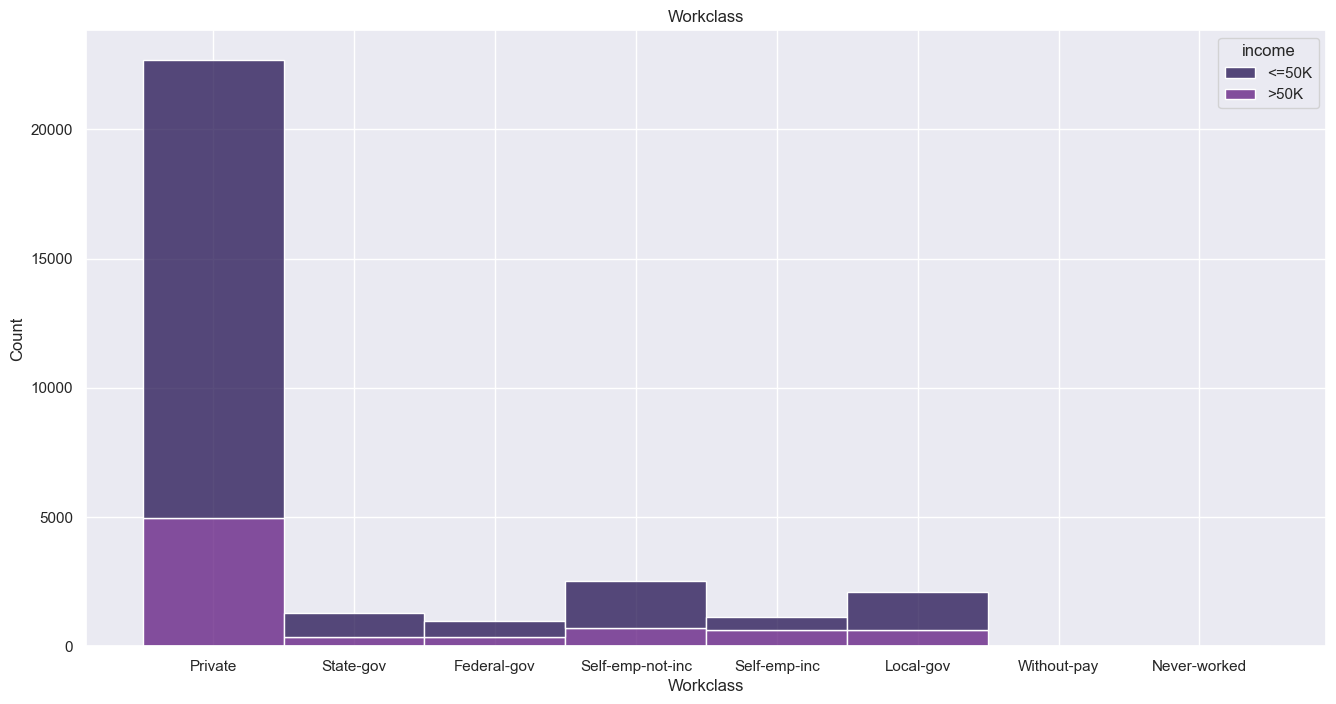

In [240]:
## Distribucion Workclass e income ##
plt.figure(figsize=(16, 8))
sns.histplot(data=df, x='workclass', hue='income', multiple='stack')
plt.xlabel('Workclass')
plt.title('Workclass')

Text(0.5, 1.0, 'Box plot de INCOME y workclass')

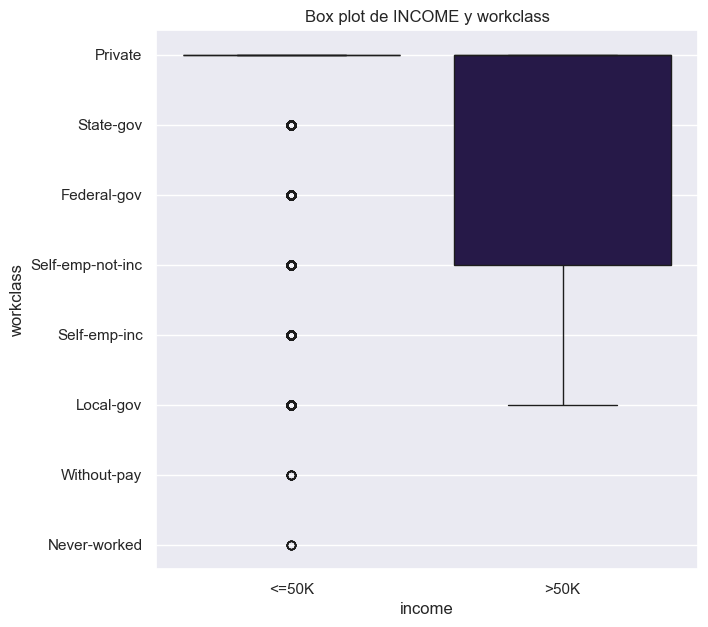

In [241]:
##Miremos el boxplot de la relacion entre work class e income ##
plt.figure(figsize=(7,7))
sns.boxplot(x='income',y='workclass',data=df).set_title('Box plot de INCOME y workclass')

#### Age con target ####

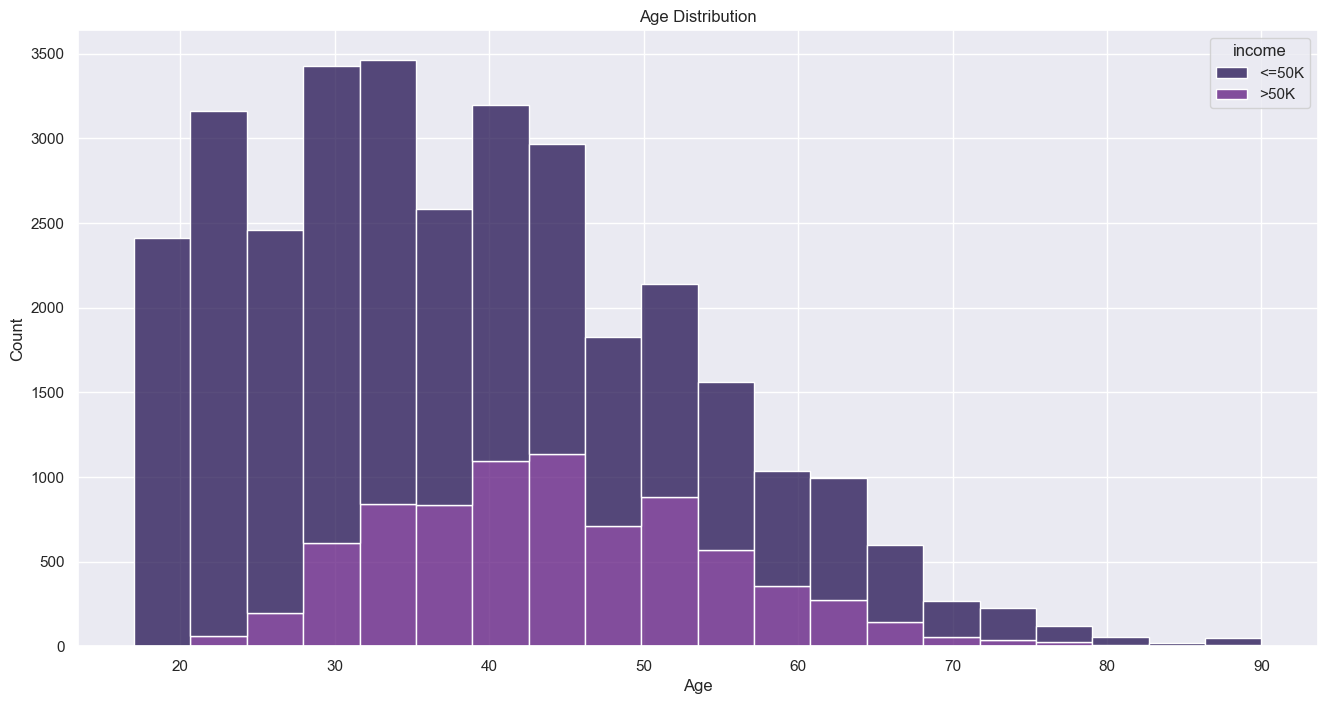

In [242]:
## Ditribucion de AGE con Income para ambas clases ##
plt.figure(figsize=(16, 8))
sns.set_theme(style="darkgrid")
sns.set_palette("magma")
sns.histplot(data=df, x='age', hue='income', bins=20, multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'Box plot de INCOME y AGE')

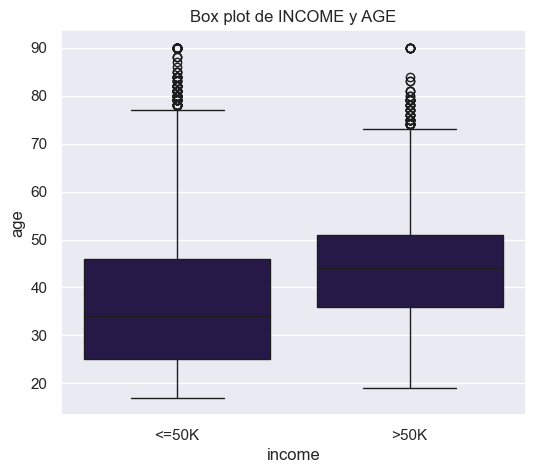

In [243]:
##Miremos el boxplot de la relacion entre edad e income ##
plt.figure(figsize=(6,5))
sns.boxplot(x='income',y='age',data=df).set_title('Box plot de INCOME y AGE')

#### Final weight con target ####

Text(0.5, 0, 'Final Weight')

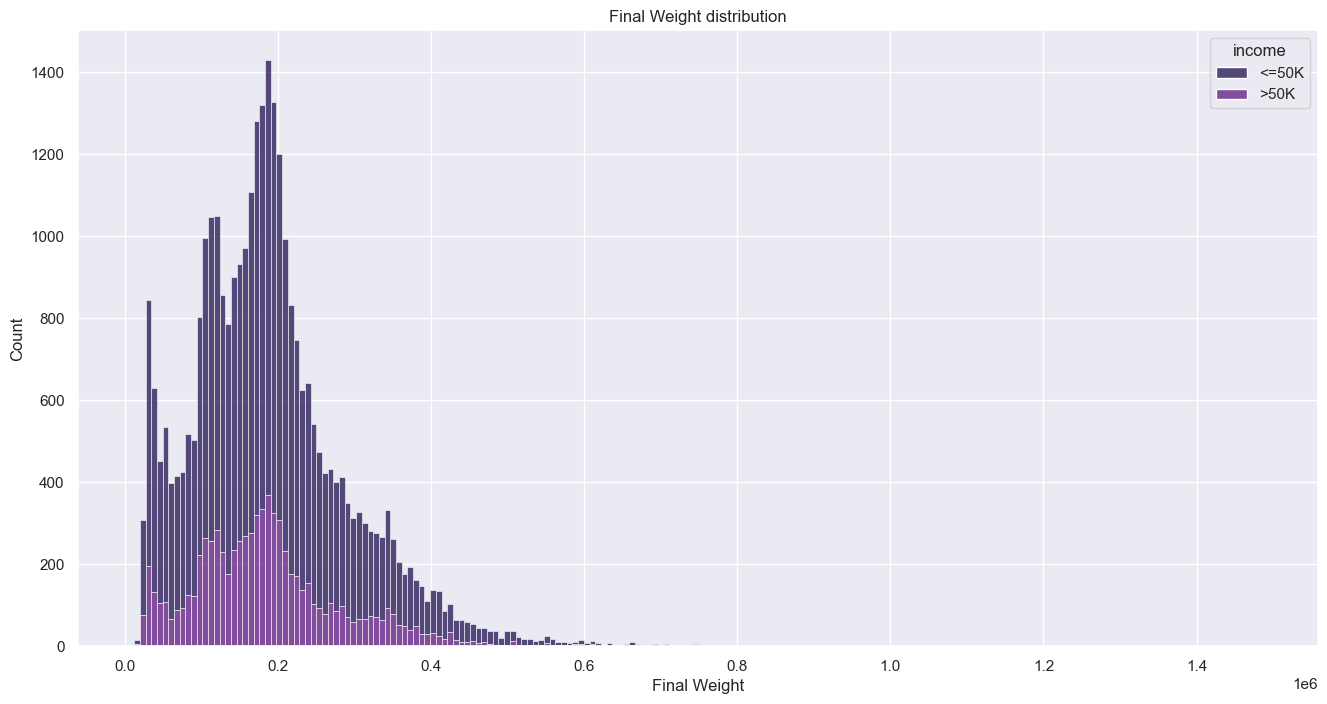

In [244]:
## Distribucion Workclass y final weight ##
plt.figure(figsize=(16, 8))
sns.histplot(x='fnlwgt', data=df, hue='income', multiple='stack')
plt.title('Final Weight distribution')
plt.xlabel('Final Weight')

Text(0.5, 1.0, 'Box plot de INCOME y fnlwgt ')

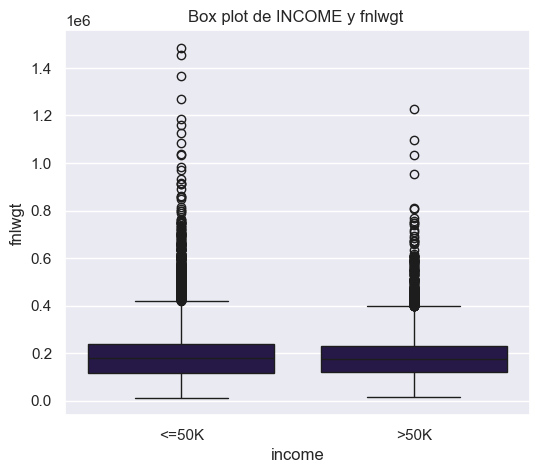

In [245]:
##Miremos el boxplot de la relacion entre fnlwgt e income ##
plt.figure(figsize=(6,5))
sns.boxplot(x='income',y='fnlwgt',data=df).set_title('Box plot de INCOME y fnlwgt ')

#### Education con target ####

<Axes: xlabel='education', ylabel='count'>

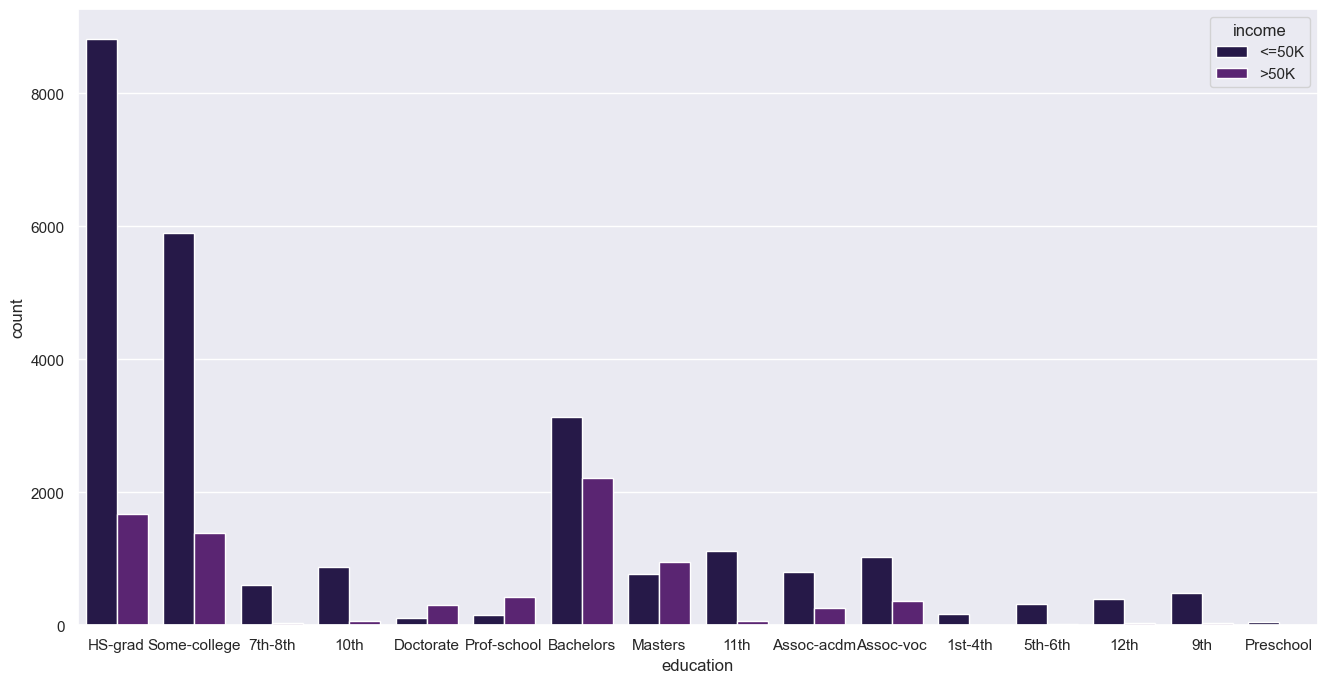

In [246]:
## Distribucion entre education e income ##
plt.figure(figsize=(16, 8))
sns.countplot(x='education', data=df, hue='income')

Text(0.5, 1.0, 'Box plot de INCOME y AGE')

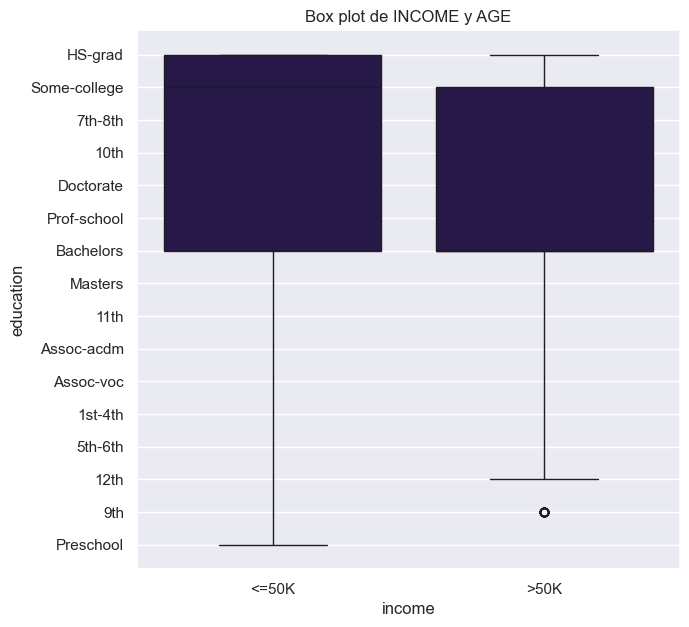

In [247]:
##Miremos el boxplot de la relacion entre education e income ##
plt.figure(figsize=(7,7))
sns.boxplot(x='income',y='education',data=df).set_title('Box plot de INCOME y AGE')

#### Education.num con target ####

<Axes: xlabel='education.num', ylabel='count'>

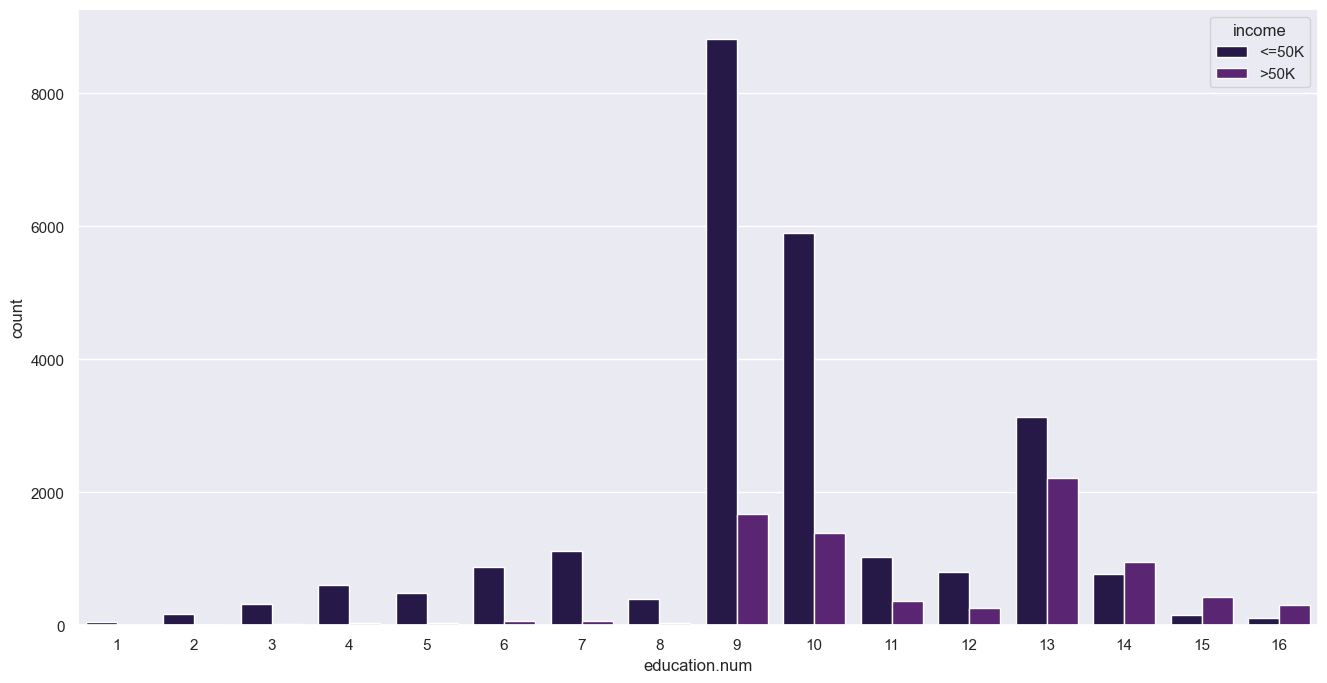

In [248]:
## Distribucion entre education.num e income ##
plt.figure(figsize=(16, 8))
sns.countplot(x='education.num', data=df, hue='income')

Text(0.5, 1.0, 'Box plot de INCOME y education.num ')

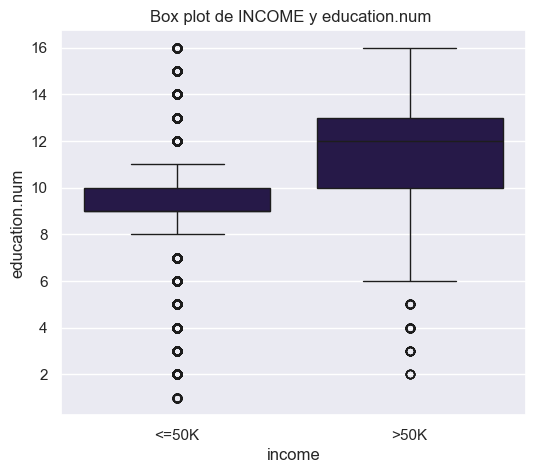

In [249]:
##Miremos el boxplot de la relacion entre education.num e income ##
plt.figure(figsize=(6,5))
sns.boxplot(x='income',y='education.num',data=df).set_title('Box plot de INCOME y education.num ')

#### capital gain y capital loss con target ####

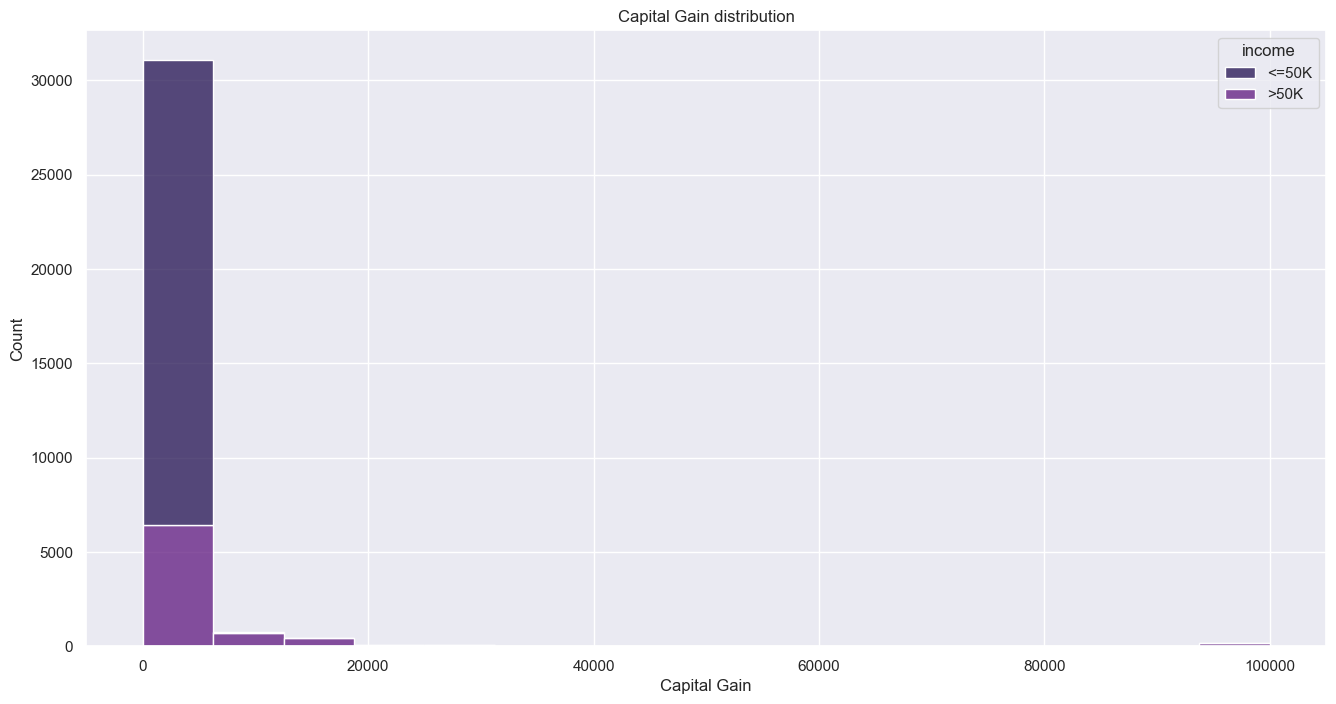

Text(0.5, 0, 'Capital Loss')

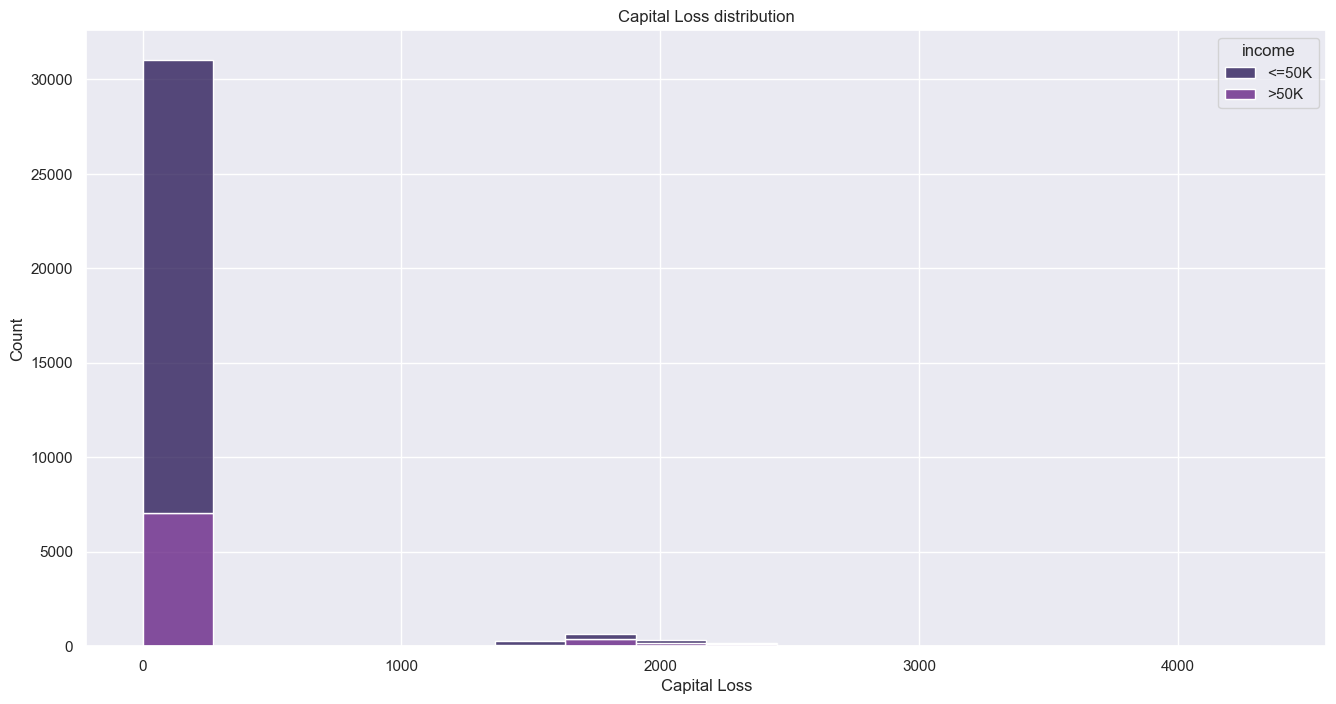

In [250]:
## Distribucion capital loss y capital gain ##

plt.figure(figsize=(16, 8))
sns.histplot(x='capital.gain', data=df, hue='income', multiple='stack')
plt.title('Capital Gain distribution')
plt.xlabel('Capital Gain')
plt.show()
plt.figure(figsize=(16, 8))
sns.histplot(x='capital.loss', data=df, hue='income', multiple='stack')
plt.title('Capital Loss distribution')
plt.xlabel('Capital Loss')

Text(0.5, 1.0, 'Box plot de INCOME y capital gain ')

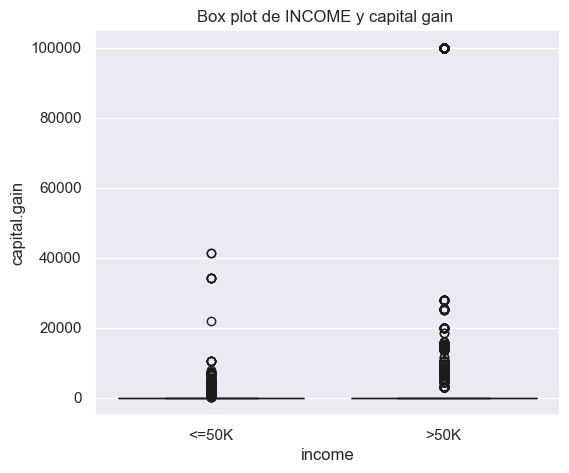

In [251]:
##Miremos el boxplot de la relacion entre education.num e income ##
plt.figure(figsize=(6,5))
sns.boxplot(x='income',y='capital.gain',data=df).set_title('Box plot de INCOME y capital gain ')

Text(0.5, 1.0, 'Box plot de INCOME y capital gain ')

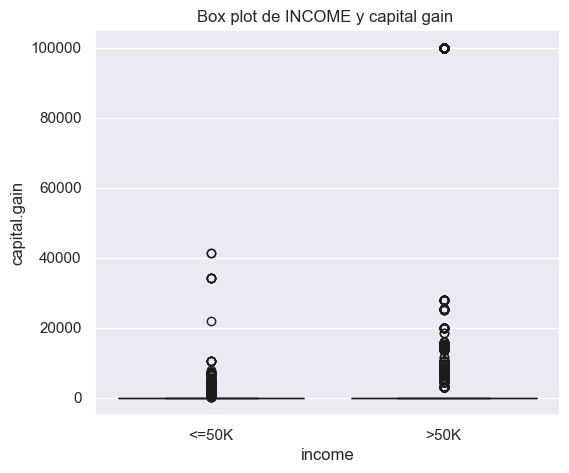

In [252]:
##Miremos el boxplot de la relacion entre education.num e income ##
plt.figure(figsize=(6,5))
sns.boxplot(x='income',y='capital.gain',data=df).set_title('Box plot de INCOME y capital gain ')

#### hours per week con target ####

<Axes: xlabel='hours.per.week', ylabel='count'>

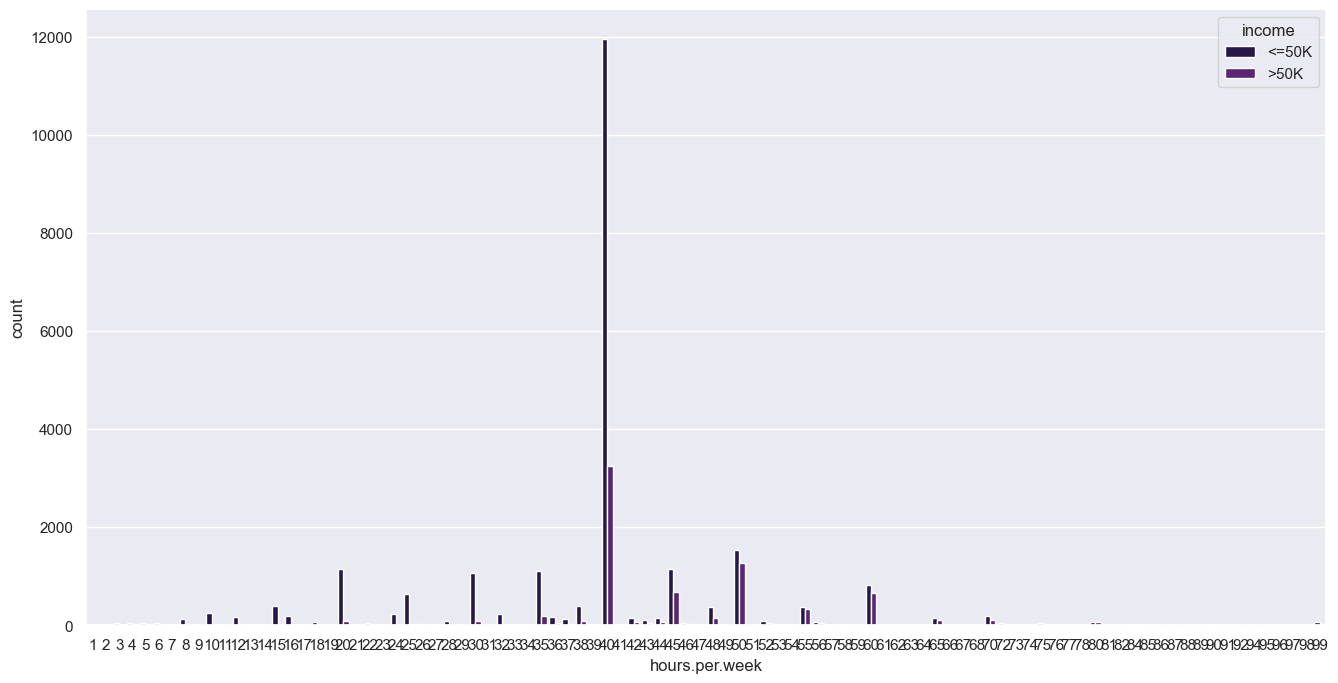

In [253]:
## Distribucion entre education.num e income ##
plt.figure(figsize=(16, 8))
sns.countplot(x='hours.per.week', data=df, hue='income')

Text(0.5, 1.0, 'Box plot de INCOME y hours.per.week')

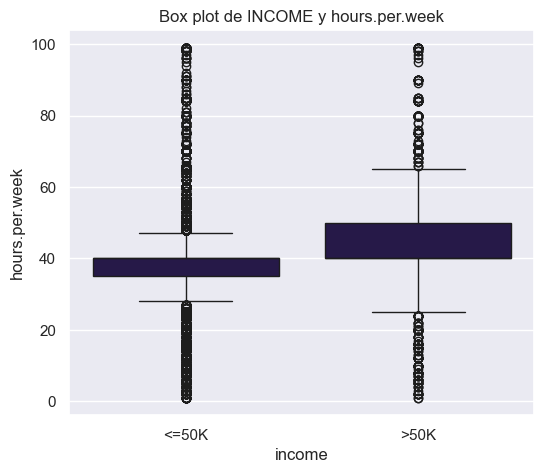

In [254]:
##Miremos el boxplot de la relacion entre hours per week  e income ##
plt.figure(figsize=(6,5))
sns.boxplot(x='income',y='hours.per.week',data=df).set_title('Box plot de INCOME y hours.per.week')

#### relationship con target ####

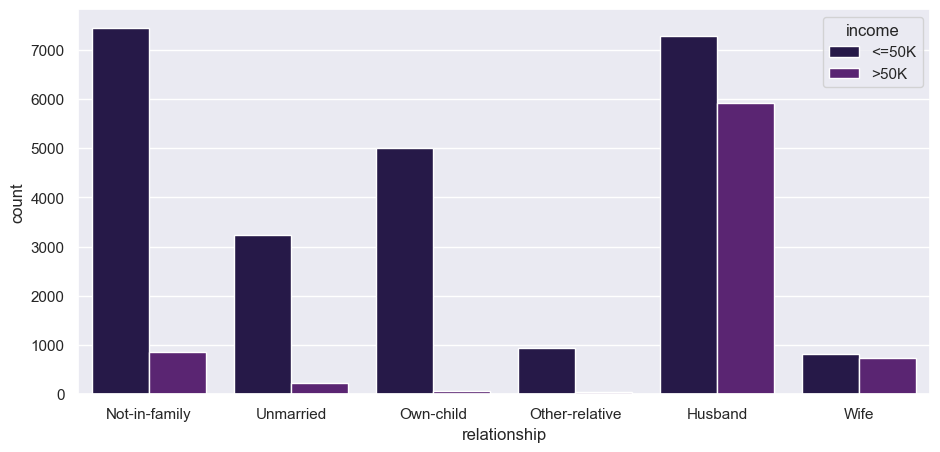

In [255]:
##Miremos la relacion entre relationship e income ##
plt.figure(figsize=(11,5))
sns.countplot(x="relationship", hue="income",data=df);

Text(0.5, 1.0, 'Box plot de INCOME y relationship')

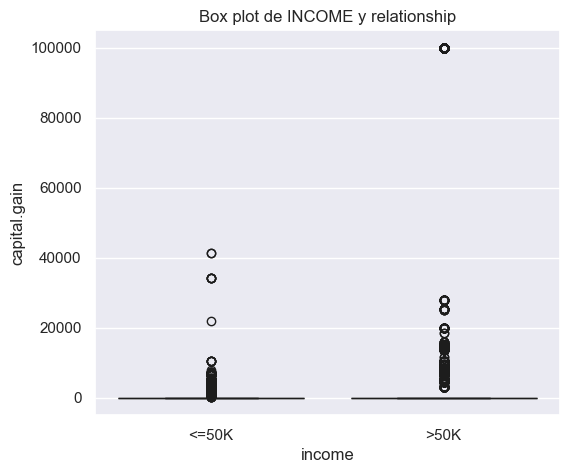

In [256]:
##Miremos el boxplot de la relacion entre relationship e income ##
plt.figure(figsize=(6,5))
sns.boxplot(x='income',y='capital.gain',data=df).set_title('Box plot de INCOME y relationship')

relationship
Husband           13193
Not-in-family      8305
Other-relative      981
Own-child          5068
Unmarried          3446
Wife               1568
dtype: int64


<Axes: xlabel='relationship', ylabel='Count'>

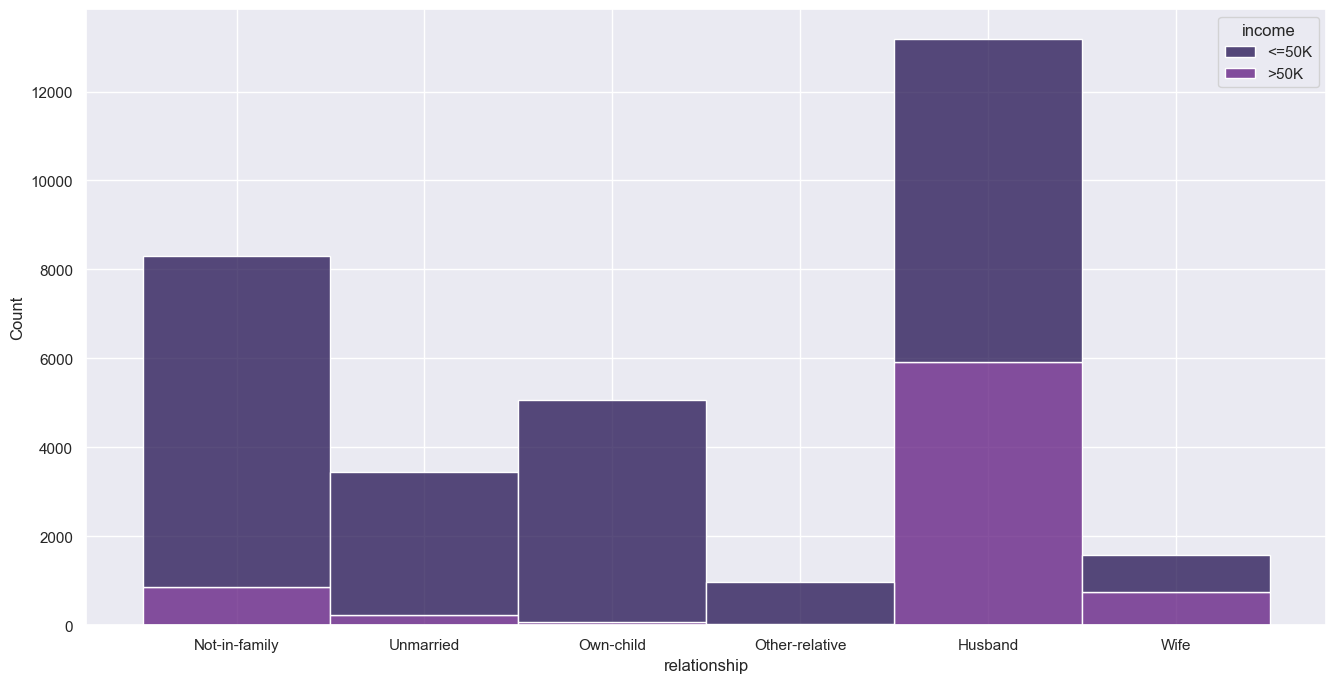

In [257]:
# Relationship #
print(df.groupby('relationship').size())
plt.figure(figsize=(16, 8))
sns.histplot(data=df, x='relationship', hue='income', multiple='stack')

#### sex y race con target ####

race
Amer-Indian-Eskimo      311
Asian-Pac-Islander     1039
Black                  3124
Other                   271
White                 27816
dtype: int64


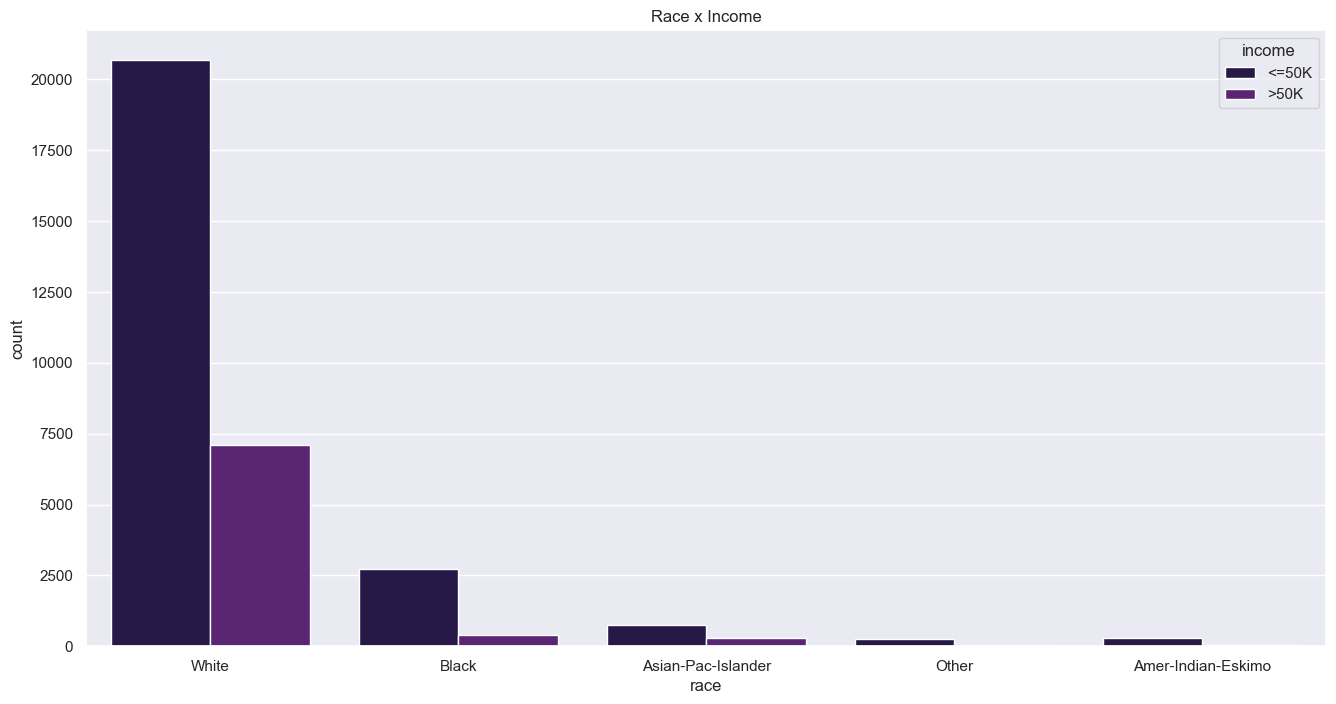

sex
Female    10771
Male      21790
dtype: int64


Text(0.5, 1.0, 'Sex x Income')

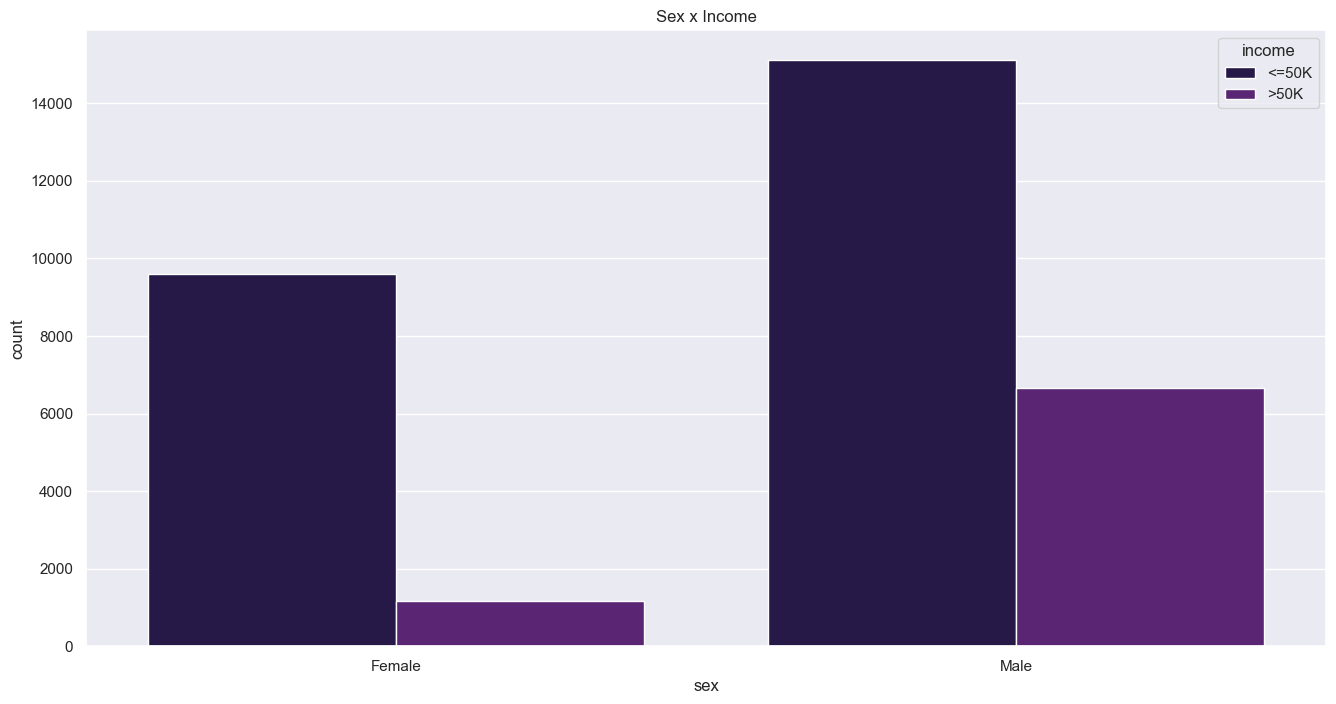

In [258]:
## Distribucion race and sex con income ##
plt.figure(figsize=(16, 8))
print(df.groupby(df.race).size())
sns.countplot(data=df, x='race', hue='income')
plt.title('Race x Income')
plt.show()
plt.figure(figsize=(16, 8))
print(df.groupby(df.sex).size())
sns.countplot(data=df, x='sex', hue='income')
plt.title('Sex x Income')

Text(0.5, 1.0, 'Box plot de INCOME y sex')

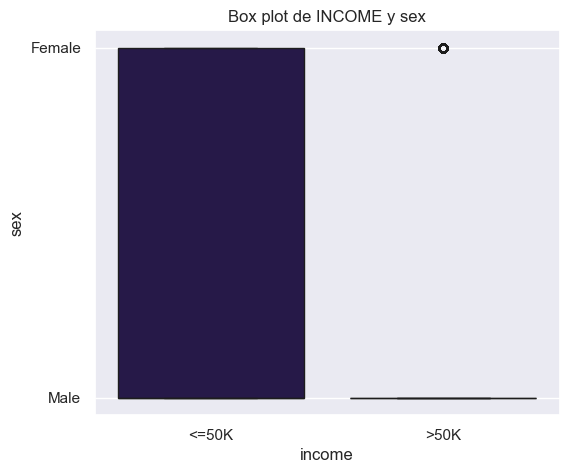

In [259]:
##Miremos el boxplot de la relacion entre sex e income ##
plt.figure(figsize=(6,5))
sns.boxplot(x='income',y='sex',data=df).set_title('Box plot de INCOME y sex')

Text(0.5, 1.0, 'Box plot de INCOME y race')

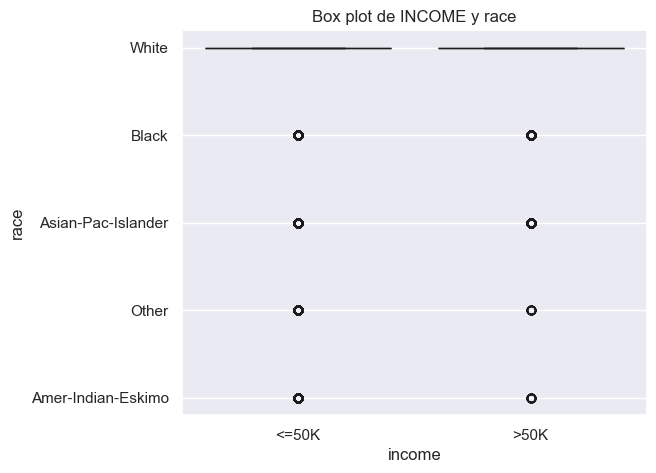

In [260]:
##Miremos el boxplot de la relacion entre race e income ##
plt.figure(figsize=(6,5))
sns.boxplot(x='income',y='race',data=df).set_title('Box plot de INCOME y race')

#### marital status con target ####

marital.status
Divorced                  4443
Married-AF-spouse           23
Married-civ-spouse       14976
Married-spouse-absent      418
Never-married            10683
Separated                 1025
Widowed                    993
dtype: int64


<Axes: xlabel='marital.status', ylabel='count'>

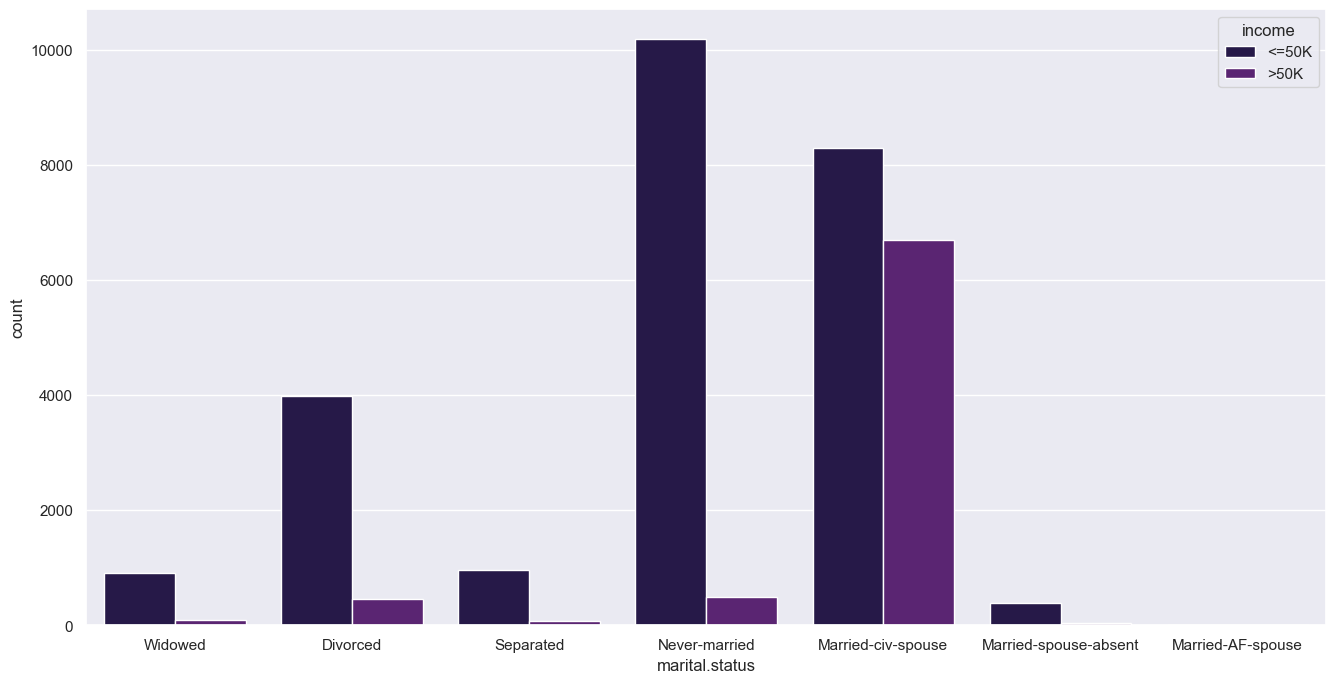

In [261]:
## Distribucion Marital status ## 
print(df.groupby('marital.status').size())
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='marital.status', hue='income')

Text(0.5, 1.0, 'Box plot de INCOME y marital status')

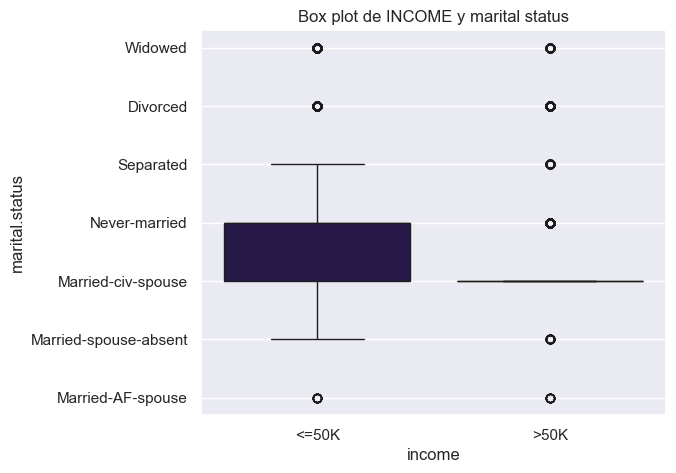

In [262]:
##Miremos el boxplot de la relacion entre marital status e income ##
plt.figure(figsize=(6,5))
sns.boxplot(x='income',y='marital.status',data=df).set_title('Box plot de INCOME y marital status')

#### occupation con target ####

occupation
Adm-clerical         3770
Armed-Forces            9
Craft-repair         4099
Exec-managerial      4066
Farming-fishing       994
Handlers-cleaners    1370
Machine-op-inspct    2002
Other-service        3295
Priv-house-serv       149
Prof-specialty       4141
Protective-serv       649
Sales                3650
Tech-support          928
Transport-moving     1597
dtype: int64


Text(0.5, 1.0, 'Occupation Distribution')

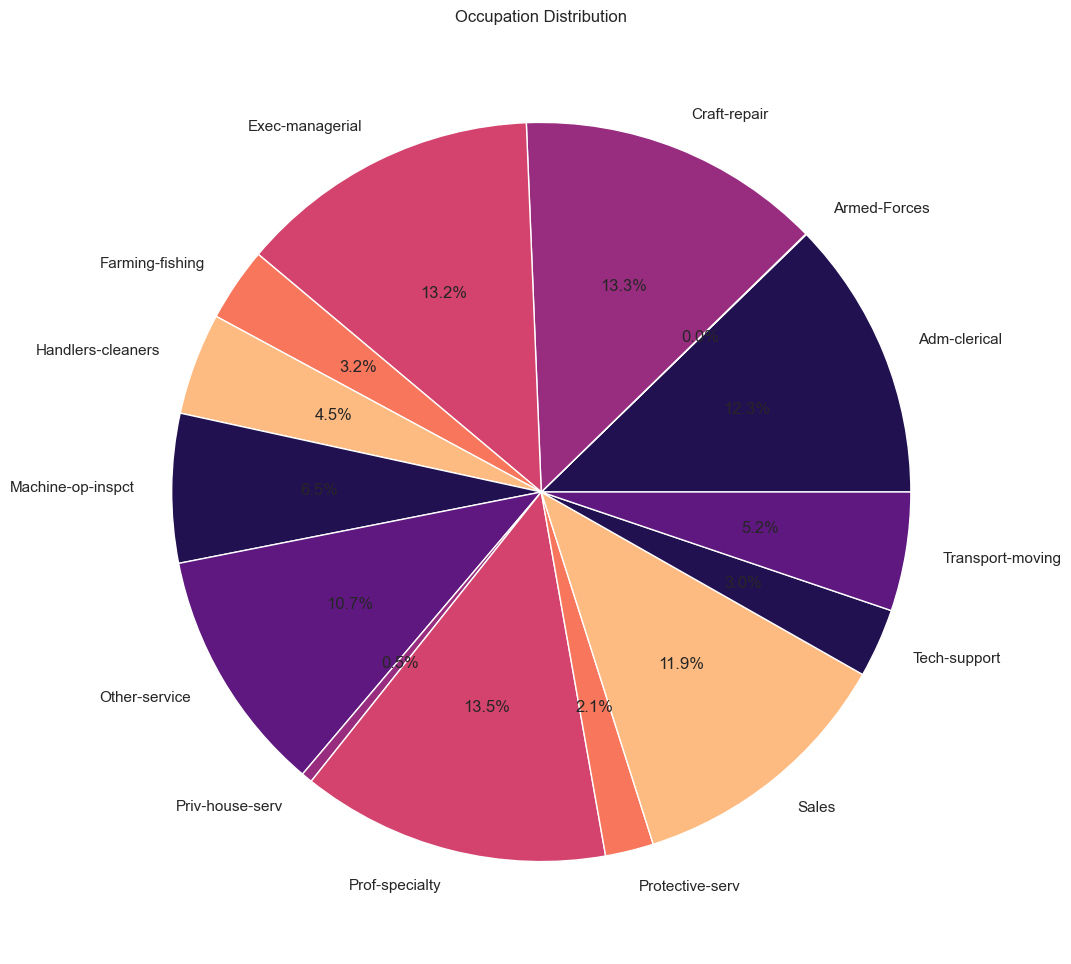

In [263]:
## Distribucion occupation ##
print(df.groupby('occupation').size())
plt.figure(figsize=(16, 12))
plt.pie(df.groupby('occupation').size(), labels=df.groupby('occupation').size().index, autopct='%1.1f%%')
plt.title('Occupation Distribution')

Text(0.5, 1.0, 'Occupation Distribution')

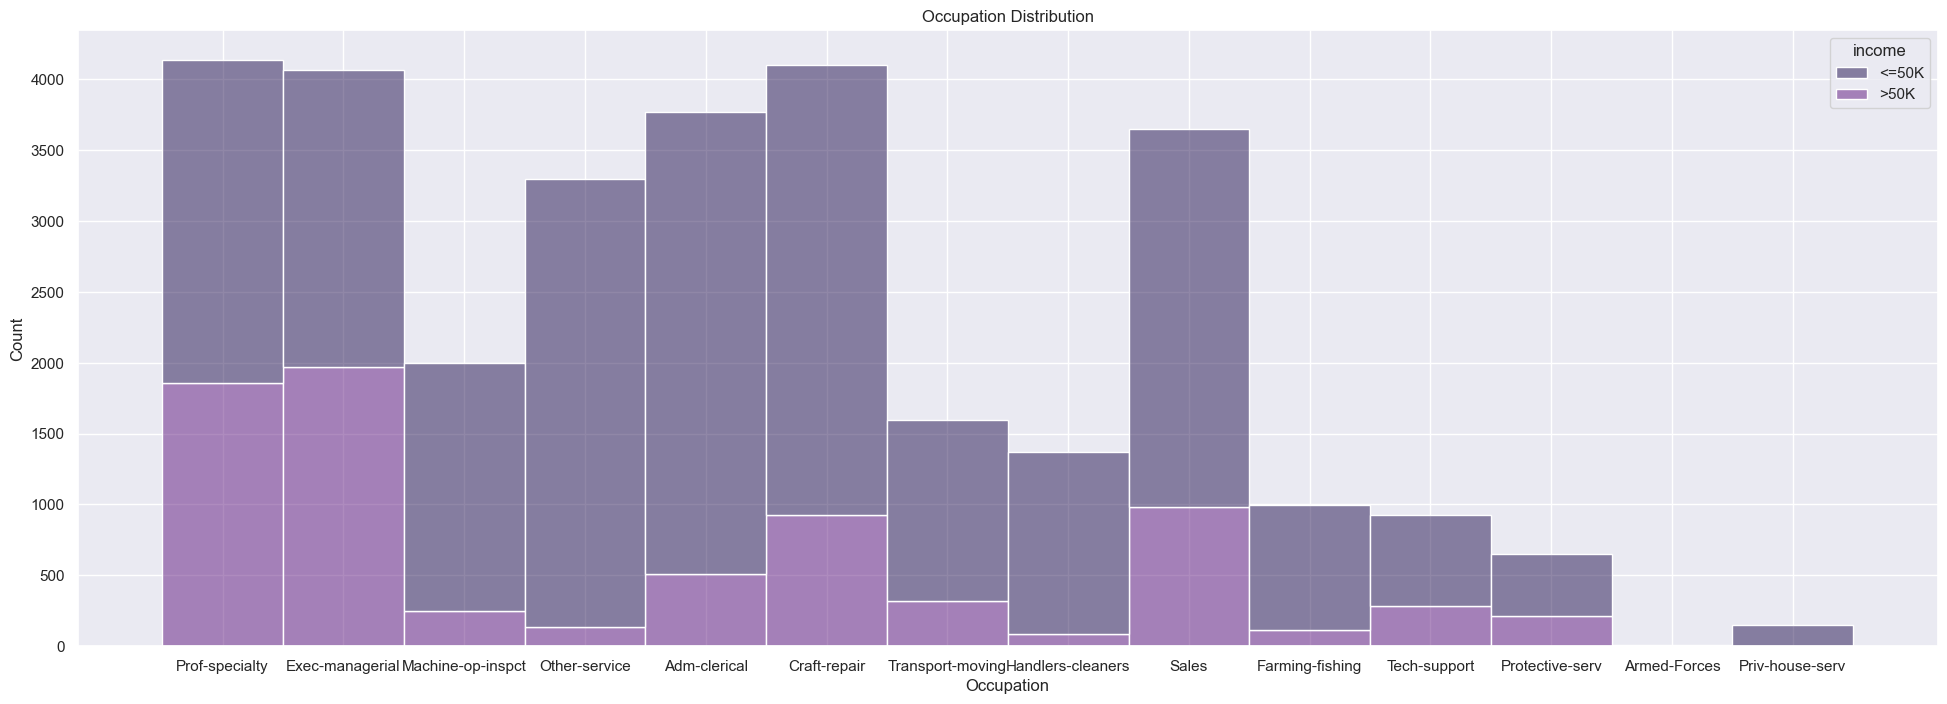

In [264]:
## Distribucion en histogrma ##
plt.figure(figsize=(24, 8))
sns.histplot(data=df, x='occupation', hue='income', multiple='stack', alpha=0.5)
plt.xlabel('Occupation')    
plt.title('Occupation Distribution')

Text(0.5, 1.0, 'Box plot de INCOME y marital status')

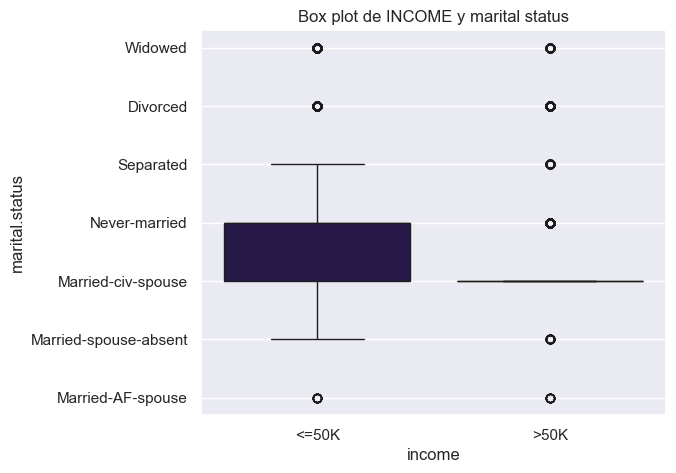

In [265]:
##Miremos el boxplot de la relacion entre occupation e income ##
plt.figure(figsize=(6,5))
sns.boxplot(x='income',y='marital.status',data=df).set_title('Box plot de INCOME y marital status')

##### Transformamos las categoricas a numericas #####

In [266]:
## Codificamos las categoricas ##

from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        le = LabelEncoder()
        
        df[col] = le.fit_transform(df[col].astype(str))

##### Correlacion en heatmap ####

<Axes: >

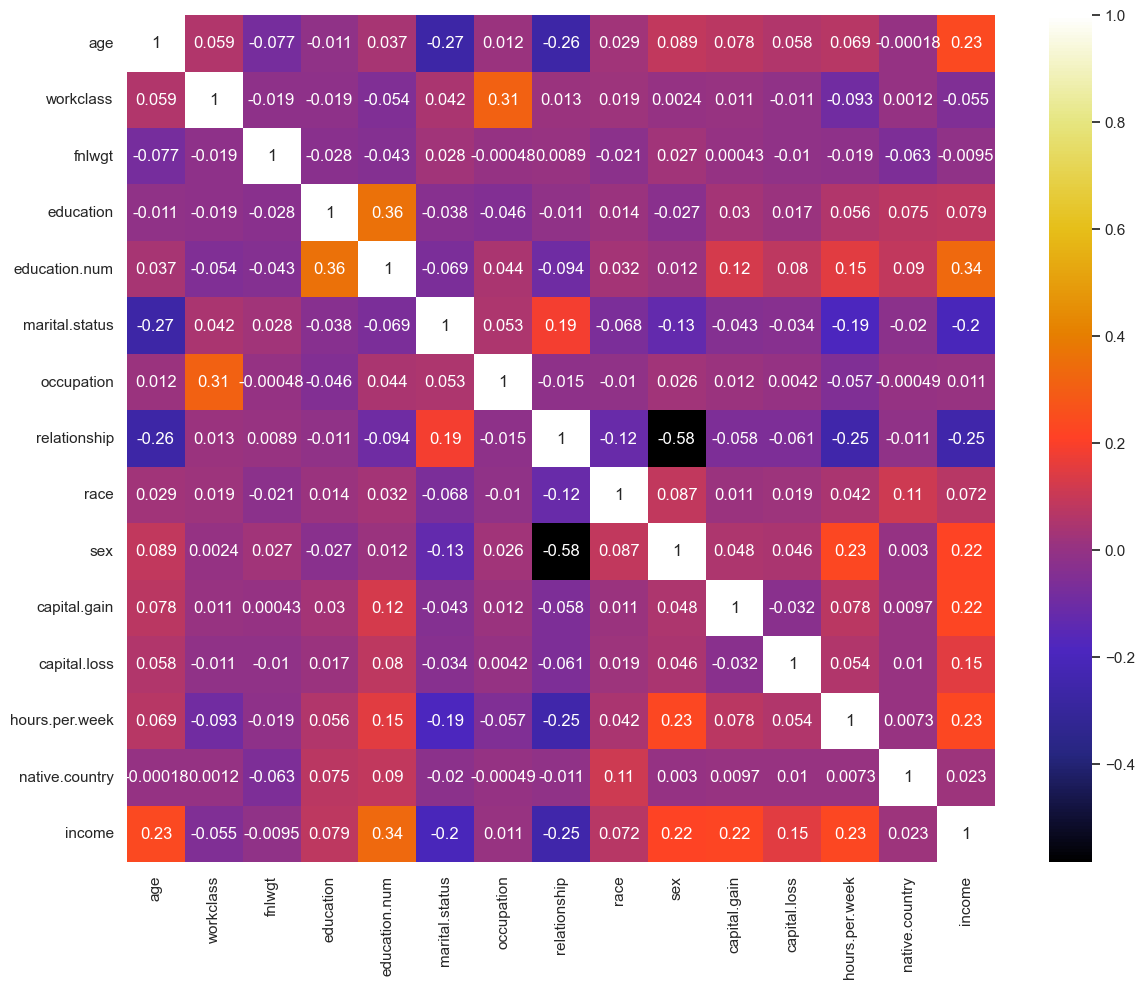

In [267]:
## Miramsos la correlacion ahora de manera global ##
plt.figure(figsize=(14, 11))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)

In [268]:
## Miramos la correlacion en este caso numericamente ##

df.corr()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
age,1.000000,0.059065,-0.076646,-0.010508,0.036527,-0.266288,0.012493,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000176,0.234037
workclass,0.059065,1.000000,-0.019063,-0.019395,-0.054317,0.042023,0.312403,0.012846,0.018877,0.002444,0.010702,-0.010918,-0.093419,0.001228,-0.055077
fnlwgt,-0.076646,-0.019063,1.000000,-0.028145,-0.043195,0.028153,-0.000483,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.062710,-0.009463
education,-0.010508,-0.019395,-0.028145,1.000000,0.359153,-0.038407,-0.046451,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.075186,0.079317
education.num,0.036527,-0.054317,-0.043195,0.359153,1.000000,-0.069304,0.044112,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.090277,0.335154
marital.status,-0.266288,0.042023,0.028153,-0.038407,-0.069304,1.000000,0.052769,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.020456,-0.199307
occupation,0.012493,0.312403,-0.000483,-0.046451,0.044112,0.052769,1.000000,-0.014616,-0.009980,0.026167,0.012356,0.004164,-0.056996,-0.000488,0.010822
relationship,-0.263698,0.012846,0.008931,-0.010876,-0.094153,0.185451,-0.014616,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.010940,-0.250918
race,0.028718,0.018877,-0.021291,0.014131,0.031838,-0.068013,-0.009980,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.111296,0.071846
sex,0.088832,0.002444,0.026858,-0.027356,0.012280,-0.129314,0.026167,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,0.003013,0.215980


In [269]:
## Miramos filas y columnas ##
df.shape

(32561, 15)

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| age | Edad de la persona |Numerica discreta|1|
| workclass| Tipo de trabajo/categoria del empleo|Categorica nominal |  2 |
| fnlwgt|El número de personas que el censo cree que representa la entrada  |Numerica discreta| 2 |
|education | El maximo nivel de educacion obtenido| Categorica ordinal | 3  |
|education.num | Los años de educacion| Numerica discreta | 1  |
| marital.status| Estado civil | Categorica nominal | 2  |
|occupation| Sector laboral al que pertenece/especialidad laboral| Categorica nominal | 2  |
|relationship| Tipo de relacion familiar| Categorica nominal | 2  |
| race | Raza| Categorica nominal | 2  |
| sex | Sexo| Categorica nominal| 1 |
|capital.gain| Ganancia de capital| Numerica continua | 1  |
|capital.loss | Perdida de capital| Numerica continua | 1  |
|hours.per.week| Horas de trabajo semanal| Numerica discreta | 1  |
|native.country| Pais de origen| Categorica nominal | 3  |
|income| Ingresos anuales ≤ 50K o > 50K   | Booleano/Target | 0  |

#### MODELADO ####

In [270]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [287]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#### Instanciamos X e Y ####

#### En este caso y tras varias pruebas eliminamos native.country y education, aparte de poca correlacion en varias pruebas sin estas dos variables se obtuvieron los mejores resultados ####

In [272]:
## Vamos a instanciar X e y##
X = df.drop(["income","native.country","education"],axis=1)
y = df['income']

#### Escalado de features ####

In [273]:
## Escalamos las variables ##
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [274]:
X = scaler.fit_transform(X)
X

array([[ 3.76961234, -0.23783994, -1.06799736, ..., -0.14592048,
        10.59350656, -0.03542945],
       [ 3.18311167, -0.23783994, -0.53916866, ..., -0.14592048,
        10.59350656, -1.81720429],
       [ 2.01011032,  2.92310139, -0.03521956, ..., -0.14592048,
        10.59350656, -0.03542945],
       ...,
       [ 0.10398314, -0.23783994, -0.33543266, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [ 1.42360965, -0.23783994, -0.35877741, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-1.21564337, -0.23783994,  0.11095988, ..., -0.14592048,
        -0.21665953, -1.65522476]])

In [275]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [276]:
X.shape

(32561, 12)

In [277]:
## Distribucion del target de nuevo ##
y.value_counts(normalize=True)

income
0    0.75919
1    0.24081
Name: proportion, dtype: float64

#### Oversampling del target ####

In [278]:
## En este modelo vamos a balancear el target ##
## Tras varias pruebas hemos elegido la opcion de oversamplear el target para conseguir mejor eficiacia y no discriminar la clase minoritaria ##

from imblearn.over_sampling import RandomOverSampler 
rs = RandomOverSampler(random_state=30)

In [279]:
## Hacemos el oversampleo ##
rs.fit(X,y)

RandomOverSampler(random_state=30)

In [280]:
## Ahora la distribucion ya es equitativa ##
x_new,y_new = rs.fit_resample(X, y)
y_new.value_counts(normalize=True)

income
0    0.5
1    0.5
Name: proportion, dtype: float64

In [198]:
x_new

array([[ 3.76961234, -0.23783994, -1.06799736, ..., -0.14592048,
        10.59350656, -0.03542945],
       [ 3.18311167, -0.23783994, -0.53916866, ..., -0.14592048,
        10.59350656, -1.81720429],
       [ 2.01011032,  2.92310139, -0.03521956, ..., -0.14592048,
        10.59350656, -0.03542945],
       ...,
       [ 0.47054606, -1.50221647,  1.65596736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [ 0.25060831, -0.23783994,  0.81895764, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [ 0.39723348, -0.23783994, -0.16813494, ...,  0.84227497,
        -0.21665953,  0.85545798]])

#### Train y Test, Train y test, Train y Test !!! ####

In [281]:
## Hacemos el train y test split ##
## Train y test split ##
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3, random_state=30)


In [200]:
## Miramos distribucion de muestras ##

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34608, 12)
X_test shape: (14832, 12)
y_train shape: (34608,)
y_test shape: (14832,)


#### Instanciamos todos los modelos que vamos a usar ####

In [282]:
## Instanciamos todos los modelos que vamos a usar##
lr = LogisticRegression(solver = "liblinear")
gn = GaussianNB()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()
ada = AdaBoostClassifier()

#### Entrenamos el conjunto de los 7 modelos elegidos ####

##### Logistic Regresion #####

In [283]:
#LogisticRegression

lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test,y_pred_lr) 


#### Classification report ####

In [288]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7404
           1       0.77      0.77      0.77      7428

    accuracy                           0.77     14832
   macro avg       0.77      0.77      0.77     14832
weighted avg       0.77      0.77      0.77     14832



#### Confusion Matrix ####

Text(47.25, 0.5, 'True')

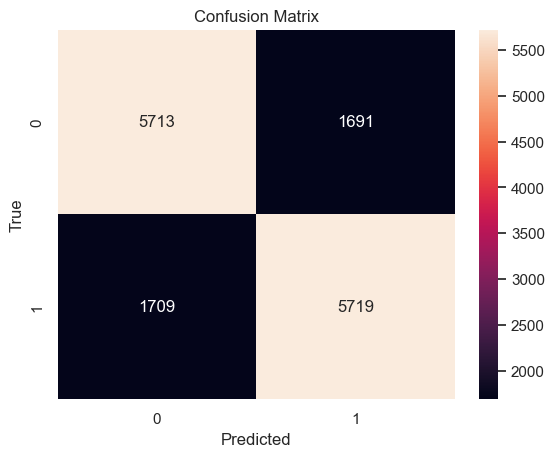

In [289]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

##### GaussianNB #####

In [290]:
#GaussianNB/ Naive Byers

gn.fit(X_train,y_train)
y_pred_gn = gn.predict(X_test)

accuracy_gn = accuracy_score(y_test, y_pred_gn)
recall_gn = recall_score(y_test, y_pred_gn)
precision_gn = precision_score(y_test, y_pred_gn)
f1_gn = f1_score(y_test, y_pred_gn)
roc_gn = roc_auc_score(y_test, y_pred_gn)
mse_gn = mean_squared_error(y_test,y_pred_gn) 


#### Classification report ####

In [291]:
print(classification_report(y_test, y_pred_gn))

              precision    recall  f1-score   support

           0       0.63      0.94      0.75      7404
           1       0.88      0.45      0.59      7428

    accuracy                           0.69     14832
   macro avg       0.75      0.69      0.67     14832
weighted avg       0.75      0.69      0.67     14832



#### Confusion Matrix ####

Text(47.25, 0.5, 'True')

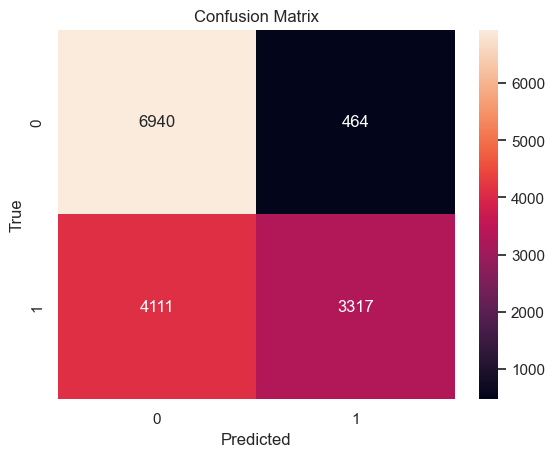

In [292]:
sns.heatmap(confusion_matrix(y_test, y_pred_gn),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

##### Random Forest #####

In [293]:
#RandomForestClassifier

rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test,y_pred_rf) 

#### Classification report ####

In [294]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      7404
           1       0.89      0.97      0.93      7428

    accuracy                           0.92     14832
   macro avg       0.93      0.92      0.92     14832
weighted avg       0.93      0.92      0.92     14832



#### Confusion Matrix ####

Text(47.25, 0.5, 'True')

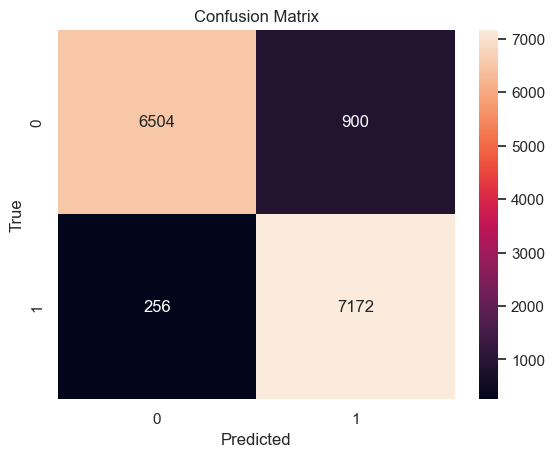

In [295]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

##### DecisionTreeClassifier #####

In [296]:
#DecisionTreeClassifier

dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_dt = roc_auc_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test,y_pred_dt) 

#### Classification report ####

In [297]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7404
           1       0.87      0.96      0.91      7428

    accuracy                           0.90     14832
   macro avg       0.91      0.90      0.90     14832
weighted avg       0.91      0.90      0.90     14832



#### Confusion Matrix ####

Text(47.25, 0.5, 'True')

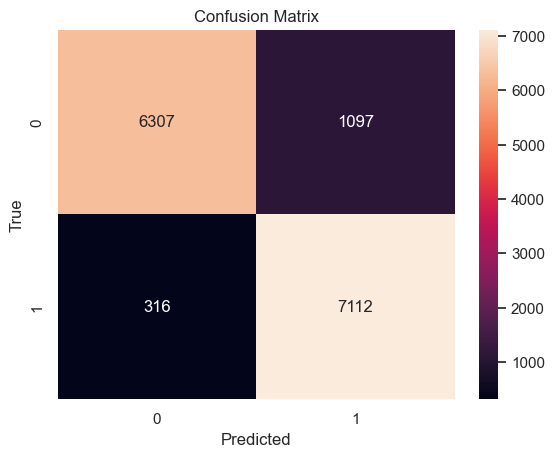

In [298]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

##### Support Vector Machine #####

In [299]:
#SVC

svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
roc_svc = roc_auc_score(y_test, y_pred_svc)
mse_svc = mean_squared_error(y_test,y_pred_svc) 

#### Classification report ####

In [300]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      7404
           1       0.79      0.88      0.83      7428

    accuracy                           0.82     14832
   macro avg       0.83      0.82      0.82     14832
weighted avg       0.83      0.82      0.82     14832



#### Confusion Matrix ####

Text(47.25, 0.5, 'True')

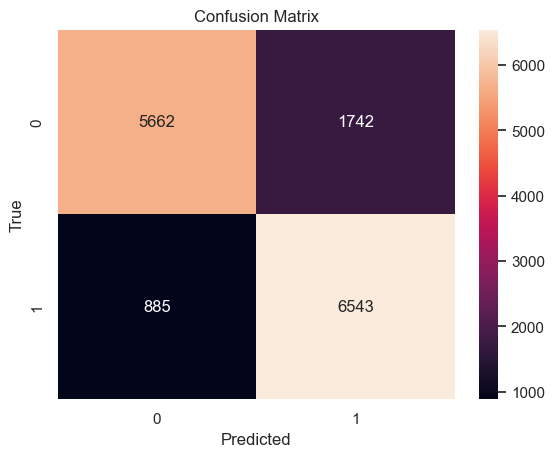

In [301]:
sns.heatmap(confusion_matrix(y_test, y_pred_svc),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

##### XGBoost #####

In [302]:
#XGB

xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

accuracy_xgb= accuracy_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_xgb = roc_auc_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test,y_pred_xgb) 

#### Classification report ####

In [303]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      7404
           1       0.85      0.90      0.87      7428

    accuracy                           0.87     14832
   macro avg       0.87      0.87      0.87     14832
weighted avg       0.87      0.87      0.87     14832



#### Confusion Matrix ####

Text(47.25, 0.5, 'True')

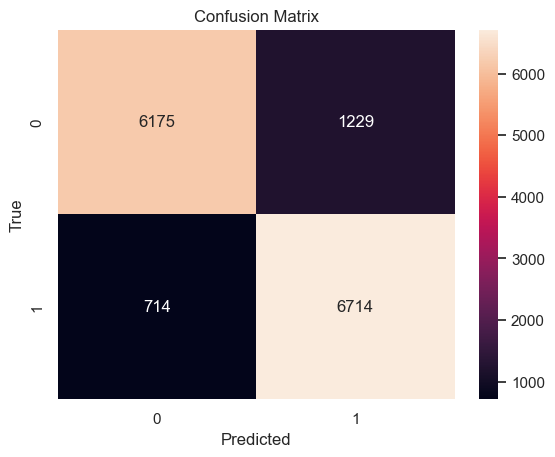

In [304]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgb ),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

##### ADABoost #####

In [308]:
##ADA

ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

accuracy_ada= accuracy_score(y_test,y_pred_ada)
recall_ada = recall_score(y_test,y_pred_ada)
precision_ada = precision_score(y_test,y_pred_ada)
f1_ada = f1_score(y_test,y_pred_ada)
roc_ada = roc_auc_score(y_test,y_pred_ada)
mse_ada = mean_squared_error(y_test,y_pred_ada) 

#### Classification report ####

In [309]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      7404
           1       0.81      0.86      0.83      7428

    accuracy                           0.83     14832
   macro avg       0.83      0.83      0.83     14832
weighted avg       0.83      0.83      0.83     14832



#### Confusion Matrix ####

Text(47.25, 0.5, 'True')

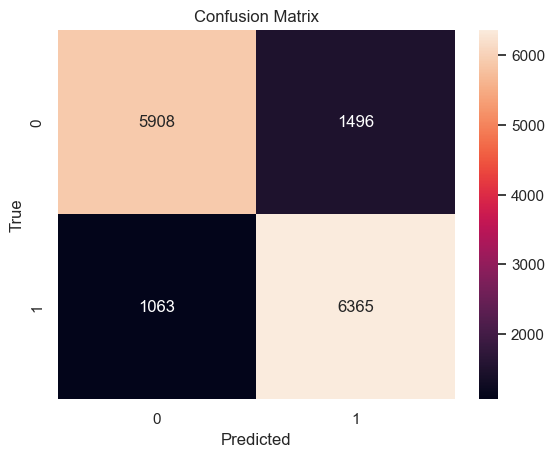

In [310]:
sns.heatmap(confusion_matrix(y_test,y_pred_ada ),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

#### Evaluamos los modelos ####

In [311]:
models = [('Logistic Regression', accuracy_lr, recall_lr , precision_lr, f1_lr, roc_lr,mse_lr),
          ('GaussianNB/ Naive Byers', accuracy_gn, recall_gn, precision_gn, f1_gn,roc_gn,mse_gn),
          ('Random Forest', accuracy_rf, recall_rf, precision_rf, f1_rf, roc_rf,mse_rf),
          ('DecisionTreeClassifier', accuracy_dt, recall_dt , precision_dt, f1_dt, roc_dt,mse_dt),
          ('SVC', accuracy_svc, recall_svc, precision_svc, f1_svc, roc_svc,mse_svc),
          ('XGB', accuracy_xgb, recall_xgb, precision_xgb, f1_xgb, roc_xgb,mse_xgb),
          ('ADA', accuracy_ada, recall_ada, precision_ada, f1_ada, roc_ada,mse_ada)]

df_all_models = pd.DataFrame(models, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC', 'MSE'])

df_all_models

,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC,MSE
0,Logistic Regression,0.770766,0.769925,0.771795,0.770859,0.770767,0.229234
1,GaussianNB/ Naive Byers,0.691545,0.446554,0.877281,0.591846,0.691942,0.308455
2,Random Forest,0.922060,0.965536,0.888503,0.925419,0.921990,0.077940
3,DecisionTreeClassifier,0.904733,0.957458,0.866366,0.909637,0.904648,0.095267
4,SVC,0.822883,0.880856,0.789740,0.832814,0.822789,0.177117
5,XGB,0.868999,0.903877,0.845273,0.873593,0.868943,0.131001
6,ADA,0.827468,0.856893,0.809693,0.832625,0.827420,0.172532


#### Representamos la accuracy de todas ellos ####

C:\Users\alvar\AppData\Local\Temp\ipykernel_82160\2268837381.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = df_all_models['Accuracy (%)'], x = df_all_models['Model'], palette = 'icefire')


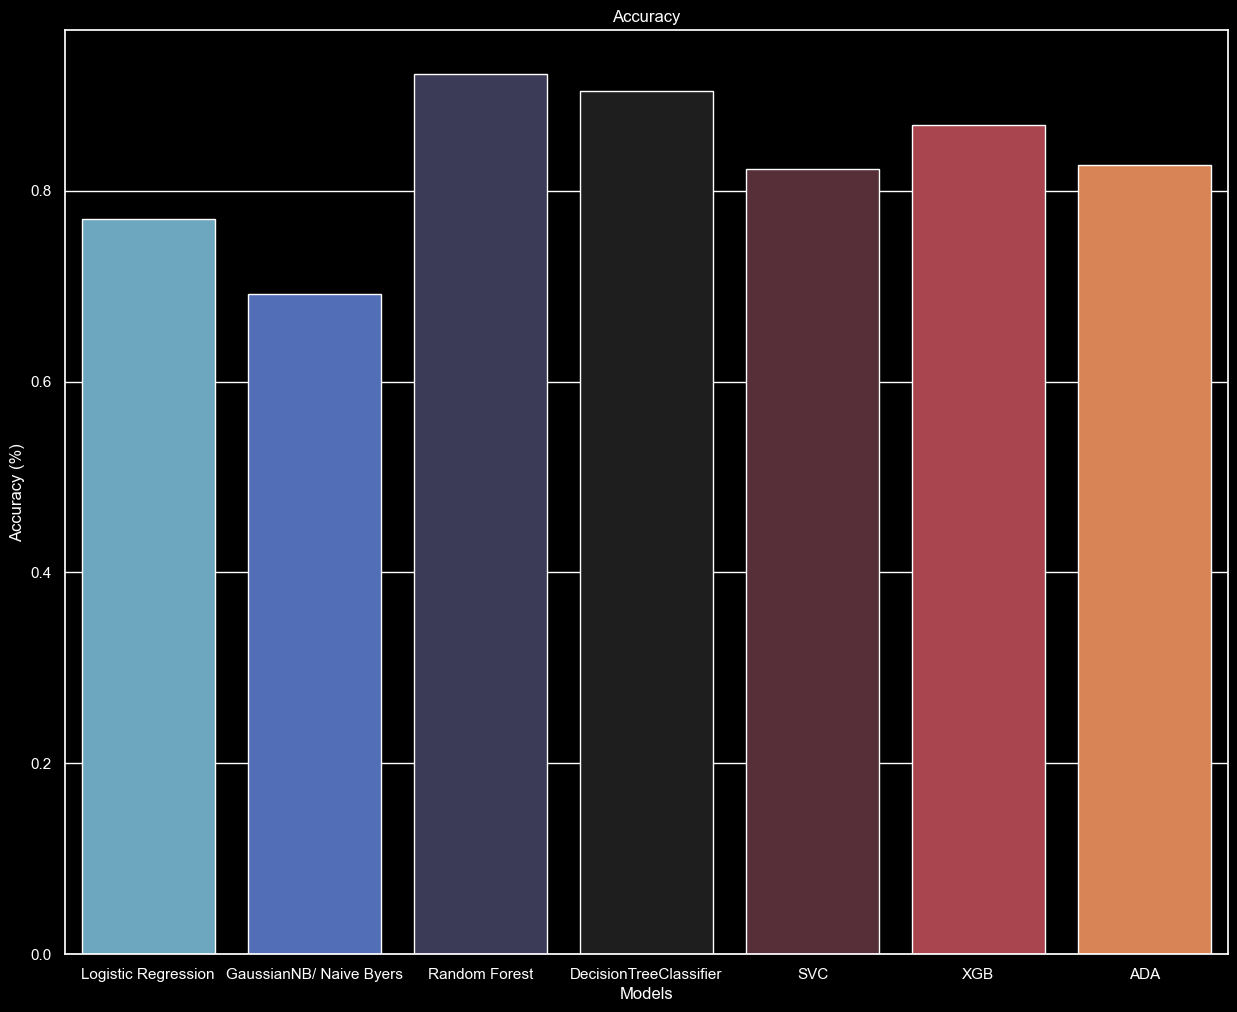

In [312]:
plt.style.use("dark_background")

plt.subplots(figsize=(15, 12))
sns.barplot(y = df_all_models['Accuracy (%)'], x = df_all_models['Model'], palette = 'icefire')
plt.xlabel("Models")
plt.title('Accuracy')
plt.show()

#### Ajustes de Hiperparametros para lo dos modelos que tienen mejores resultados (Decision Tree Classifier y Random Forest) ####

##### Decision Tree Classifier #####

In [313]:
from sklearn.model_selection import GridSearchCV



params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100,150],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, param_grid=params,cv=5, n_jobs=1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 150]},
             scoring='accuracy', verbose=1)

#### Dataframe de reporte de resultados del entrenamiento del grid Search ####

In [315]:
## Sacamos data frame de los resultados ##

score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015979,0.002262,0.000596,0.000798,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.761052,0.762641,0.76004,0.759428,0.762173,0.761067,0.00122,49
1,0.018023,0.006027,0.002274,0.003785,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.761052,0.762641,0.76004,0.759428,0.762173,0.761067,0.00122,49
2,0.022338,0.005648,0.000323,0.000414,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.761052,0.762641,0.76004,0.759428,0.762173,0.761067,0.00122,49
3,0.014512,0.004923,0.002690,0.004444,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.761052,0.762641,0.76004,0.759428,0.762173,0.761067,0.00122,49
4,0.017585,0.003641,0.000200,0.000400,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.761052,0.762641,0.76004,0.759428,0.762173,0.761067,0.00122,49


In [316]:
## Comprobamos los mejores hiperparametros ##

grid_search.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}

In [317]:
## Comprobamos el mejor score ##

grid_search.best_score_

0.8431287872990681

#### Entrenamos el modelo con los mejores hiperparametros ####

In [318]:
## Entrenamos el modelo con los hiperparametros seleccionados ## 

dt_tuned = DecisionTreeClassifier(criterion="gini",max_depth=20,min_samples_leaf=5)
dt_tuned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

##### Nuevos resultados #####

In [320]:
## Hacemos la predicicon al decission tree classifier con el modelo ya entrenado ##

y_pred_dt_tuned = dt_tuned.predict(X_test)
print("DecisionTreeClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_dt_tuned) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_dt_tuned) * 100,3))

DecisionTreeClassifier:
Accuracy score: 85.491
F1 Score:  85.931
MSE:  14.509


#### Matriz de confusion ####

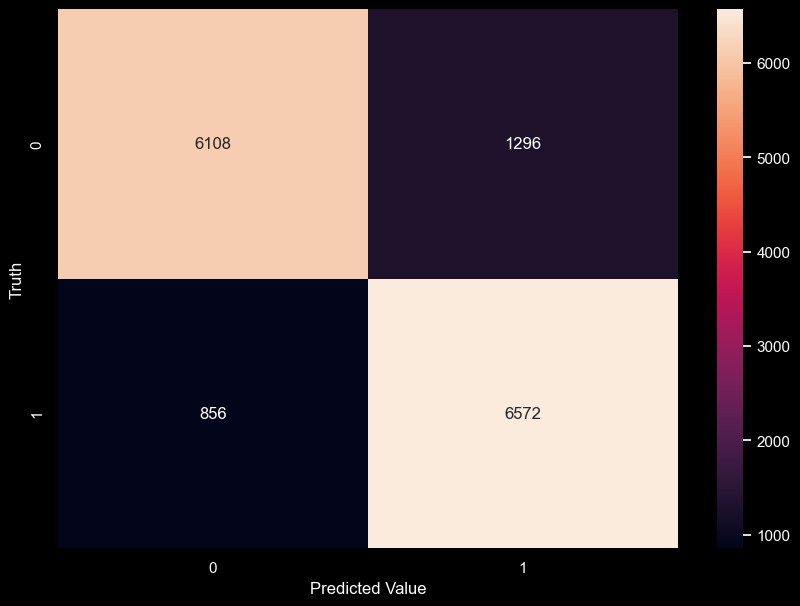

In [321]:
## Comprobamos la matriz de confusion del modelo ##

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt_tuned)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

##### Random Forest #####

In [322]:
## Buscamos los mejores hiperparametros ##

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

parameters = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

rf_modificado= RandomForestClassifier(random_state=30)
                       
rf_cv = RandomizedSearchCV(estimator= rf_modificado, param_distributions=parameters, cv=5, random_state=30)

In [323]:
## Lo entrenamos ##

rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=30)

In [324]:
## Miramos los mejores hiperparametros ##

rf_cv.best_params_

{'n_estimators': 110, 'max_depth': 47}

In [325]:
## Miramos los resultados ##

rf_cv.best_score_

0.9105119230398161

In [327]:
## Entrenamos de nuevo el Random forest con los Hiperparametros ajustados ##

rf_tuned = RandomForestClassifier(max_depth=95, n_estimators=142, random_state=30)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=95, n_estimators=142, random_state=30)

In [328]:
## Hacemos la prediccion
y_pred_rf_tuned = rf_tuned.predict(X_test)
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_rf_tuned) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_rf_tuned) * 100,3))

RandomForestClassifier:
Accuracy score: 92.321
F1 Score:  92.658
MSE:  7.679


#### Dataframe de reporte de resultados del entrenamiento del grid Search ####

In [329]:
## Sacamos datset con los resultados ##

score_rf = pd.DataFrame(rf_cv.cv_results_)
score_rf.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.426234,0.084141,0.103094,0.004322,102,40,"{'n_estimators': 102, 'max_depth': 40}",0.912886,0.909564,0.911442,0.908106,0.909984,0.910396,0.001637,3
1,1.321011,0.006512,0.042058,0.007352,40,134,"{'n_estimators': 40, 'max_depth': 134}",0.911875,0.911731,0.912742,0.905216,0.909406,0.910194,0.002723,5
2,2.618000,0.017185,0.075253,0.008357,79,126,"{'n_estimators': 79, 'max_depth': 126}",0.911875,0.909853,0.912164,0.906227,0.909262,0.909876,0.002141,8
3,2.887720,0.021333,0.085034,0.005477,87,134,"{'n_estimators': 87, 'max_depth': 134}",0.911442,0.910286,0.912742,0.905360,0.910129,0.909992,0.002499,6
4,2.352584,0.022357,0.068159,0.002007,71,95,"{'n_estimators': 71, 'max_depth': 95}",0.910719,0.909275,0.912164,0.904783,0.909551,0.909298,0.002477,10


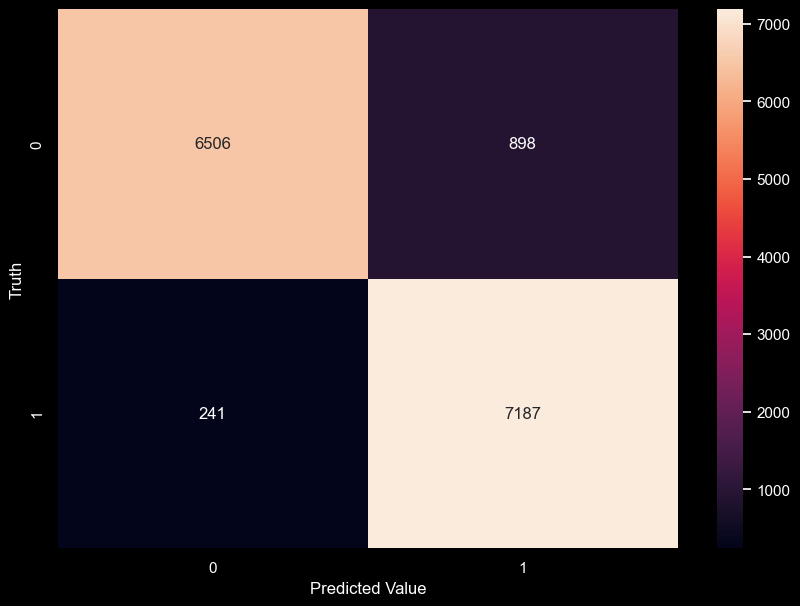

In [330]:
## Comprobamos la matriz de confusion del modelo ##

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

#### Detencion de errores ####

In [331]:
from sklearn.model_selection import cross_val_score

modelos = [rf_tuned,dt_tuned]

# Supongamos que 'modelos' es una lista que contiene tus dos mejores modelos
# y 'X' es tu conjunto de características y 'y' es tu conjunto de etiquetas

resultados_validacion_cruzada = []

for modelo in modelos:
    # Realizar validación cruzada
    scores = cross_val_score(modelo, x_new, y_new, cv=5)  # Cambia el número de splits de acuerdo a tu necesidad
    resultados_validacion_cruzada.append(scores)

# Calcular la media y la desviación estándar de los puntajes de validación cruzada
for i, scores in enumerate(resultados_validacion_cruzada):
    print(f"Modelo {i+1}:")
    print("Exactitud media:", np.mean(scores))
    print("Desviación estándar:", np.std(scores))

Modelo 1:
Exactitud media: 0.9095873786407767
Desviación estándar: 0.056066779082230775
Modelo 2:
Exactitud media: 0.8389967637540453
Desviación estándar: 0.04680488016735029


### Conclusiones ###

##### El mejor modelo finalmente es del Random Forest para este caso concreto, el que mayor acccuracy ha conseguido y tambien el que mayor exactitud media tiene a su vez una desviacion estandar muy baja #####

#### Ajustando los hiperparametros conseguimos mejorarlo ligeramente ####

#### Sin embargo el Decision tree empeora con el ajuste de hiperparametros, con los hiperparametros por defecto es mas eficiente, eso puede ser porque seguramente haga mas overfitting  ####

In [335]:
import pickle


with open('modelo_entrenado.pkl', 'wb') as archivo:
    pickle.dump(rf_tuned, archivo)

# Mensaje de confirmación
print("Modelo entrenado guardado correctamente como'modelo_entrenado.pkl'")

Modelo entrenado guardado correctamente como'modelo_entrenado.pkl'
